# **Predicting IC50 and Uncovering More Effective Drugs through Machine Learning Models**
# Iván Barra Borrella

### In this Jupyter notebook, we'll create a machine learning model to predict IC50 from data in the ChEMBL database. Additionally, we'll not only predict IC50 but also embark on drug discovery by searching for more effective drugs through the identification of analogs with enhanced properties.

## **Data Collection and Pre-Processing**

### **ChEMBL Database**

The ChEMBL Database is a database that contains curated bioactivity data from over 2 million compounds. It is compiled from over 76,000 documents, 1.2 million assays, and the data spans 13,000 targets and 1,800 cells and 33,000 indications. [Data as of March 25, 2020; ChEMBL version 26].

### **Install libraries**

Install the ChEMBL web service package so that we can retrieve bioactivity data from the ChEMBL Database.

In [96]:
#!python -m pip install chembl_webresource_client

### **Import libraries**

In [97]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

### **Search for Target protein**

### Search for the target in this case the Son of sevenless (SOS) protein. Dominant mutant alleles of SOS1 have recently been found to cause Noonan syndrome and hereditary gingival fibromatosis type 1.

In [98]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('sos')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Son of sevenless homolog 1,17.0,False,CHEMBL2079846,"[{'accession': 'Q07889', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Son of sevenless homolog 2,17.0,False,CHEMBL4524041,"[{'accession': 'Q07890', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Mus musculus,Son of sevenless homolog 1,16.0,False,CHEMBL4523334,"[{'accession': 'Q62245', 'component_descriptio...",SINGLE PROTEIN,10090
3,[],Homo sapiens,VHL/SOS1,14.0,False,CHEMBL5169070,"[{'accession': 'Q07889', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
4,[],Homo sapiens,VHL/SOS2,14.0,False,CHEMBL5169071,"[{'accession': 'P40337', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
5,[],Spinacia oleracea,"Protoporphyrinogen oxidase, chloroplastic/mito...",8.0,False,CHEMBL2366509,"[{'accession': 'Q94IG7', 'component_descriptio...",SINGLE PROTEIN,3562


### **Select and retrieve bioactivity data (first entry)**

We will assign the fifth entry (which corresponds to the target protein, *SOS*) to the ***selected_target*** variable 

In [99]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL2079846'

In [100]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [101]:
df = pd.DataFrame.from_dict(res)

In [102]:
df.head(3)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,11011905,[],CHEMBL2089532,Inhibition to His6-tagged Sos1 catalytic domai...,B,None,None,BAO_0000190,...,Homo sapiens,Son of sevenless homolog 1,9606,None,None,IC50,uM,UO_0000065,None,25.0
1,None,None,19355233,[],CHEMBL4421085,Inhibition of N-terminal 6x-His-tagged recombi...,B,None,None,BAO_0000190,...,Homo sapiens,Son of sevenless homolog 1,9606,None,None,IC50,uM,UO_0000065,None,15.4
2,None,None,19355234,[],CHEMBL4421085,Inhibition of N-terminal 6x-His-tagged recombi...,B,None,None,BAO_0000190,...,Homo sapiens,Son of sevenless homolog 1,9606,None,None,IC50,uM,UO_0000065,None,10.8


In [103]:
df.standard_type.unique()

array(['IC50'], dtype=object)

Finally we will save the resulting bioactivity data to a CSV file **bioactivity_data.csv**.

In [104]:
#IF WE WANT TO SAVE THE FILE IN CSV FORMAT REMOVE THE HASHTAG, THE SAME IN LOWER HASHTAGS
#df.to_csv('sos_bioactivity_data_raw.csv', index=False)

### **Handling missing data**
If any compounds has missing value for the **standard_value** and **canonical_smiles** column then drop it.

In [105]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

C:\Users\Ivanb\AppData\Local\Temp\ipykernel_3444\3852201246.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,11011905,[],CHEMBL2089532,Inhibition to His6-tagged Sos1 catalytic domai...,B,None,None,BAO_0000190,...,Homo sapiens,Son of sevenless homolog 1,9606,None,None,IC50,uM,UO_0000065,None,25.0
1,None,None,19355233,[],CHEMBL4421085,Inhibition of N-terminal 6x-His-tagged recombi...,B,None,None,BAO_0000190,...,Homo sapiens,Son of sevenless homolog 1,9606,None,None,IC50,uM,UO_0000065,None,15.4
2,None,None,19355234,[],CHEMBL4421085,Inhibition of N-terminal 6x-His-tagged recombi...,B,None,None,BAO_0000190,...,Homo sapiens,Son of sevenless homolog 1,9606,None,None,IC50,uM,UO_0000065,None,10.8
3,None,None,19355235,[],CHEMBL4421085,Inhibition of N-terminal 6x-His-tagged recombi...,B,None,None,BAO_0000190,...,Homo sapiens,Son of sevenless homolog 1,9606,None,None,IC50,uM,UO_0000065,None,49.9
9,None,None,19355241,[],CHEMBL4421085,Inhibition of N-terminal 6x-His-tagged recombi...,B,None,None,BAO_0000190,...,Homo sapiens,Son of sevenless homolog 1,9606,None,None,IC50,uM,UO_0000065,None,45.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,None,None,24953873,"[{'comments': None, 'relation': None, 'result_...",CHEMBL5210039,Affinity Phenotypic Cellular interaction (HTRF...,B,None,None,BAO_0000190,...,Homo sapiens,Son of sevenless homolog 1,9606,None,None,IC50,nM,UO_0000065,None,4570.0
274,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24954060,"[{'comments': None, 'relation': None, 'result_...",CHEMBL5210221,Affinity On-target Cellular interaction (ELISA...,B,None,None,BAO_0000190,...,Homo sapiens,Son of sevenless homolog 1,9606,None,None,IC50,nM,UO_0000065,None,200.0
275,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24954377,"[{'comments': None, 'relation': None, 'result_...",CHEMBL5210495,Affinity Biochemical interaction (KRASG12C–SOS...,B,None,None,BAO_0000190,...,Homo sapiens,Son of sevenless homolog 1,9606,None,None,IC50,nM,UO_0000065,None,21.0
276,None,None,24954383,"[{'comments': None, 'relation': None, 'result_...",CHEMBL5210501,Affinity Biochemical interaction (KRASG12C–SOS...,B,None,None,BAO_0000190,...,Homo sapiens,Son of sevenless homolog 1,9606,None,None,IC50,nM,UO_0000065,None,2340.0


In [106]:
len(df2.canonical_smiles.unique())

255

In [107]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,11011905,[],CHEMBL2089532,Inhibition to His6-tagged Sos1 catalytic domai...,B,None,None,BAO_0000190,...,Homo sapiens,Son of sevenless homolog 1,9606,None,None,IC50,uM,UO_0000065,None,25.0
1,None,None,19355233,[],CHEMBL4421085,Inhibition of N-terminal 6x-His-tagged recombi...,B,None,None,BAO_0000190,...,Homo sapiens,Son of sevenless homolog 1,9606,None,None,IC50,uM,UO_0000065,None,15.4
2,None,None,19355234,[],CHEMBL4421085,Inhibition of N-terminal 6x-His-tagged recombi...,B,None,None,BAO_0000190,...,Homo sapiens,Son of sevenless homolog 1,9606,None,None,IC50,uM,UO_0000065,None,10.8
3,None,None,19355235,[],CHEMBL4421085,Inhibition of N-terminal 6x-His-tagged recombi...,B,None,None,BAO_0000190,...,Homo sapiens,Son of sevenless homolog 1,9606,None,None,IC50,uM,UO_0000065,None,49.9
9,None,None,19355241,[],CHEMBL4421085,Inhibition of N-terminal 6x-His-tagged recombi...,B,None,None,BAO_0000190,...,Homo sapiens,Son of sevenless homolog 1,9606,None,None,IC50,uM,UO_0000065,None,45.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24698103,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5107176,Inhibition of SOS1 in human DLD-1 cells assess...,B,None,None,BAO_0000190,...,Homo sapiens,Son of sevenless homolog 1,9606,None,None,IC50,nM,UO_0000065,None,70.0
268,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24698104,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5107176,Inhibition of SOS1 in human DLD-1 cells assess...,B,None,None,BAO_0000190,...,Homo sapiens,Son of sevenless homolog 1,9606,None,None,IC50,nM,UO_0000065,None,11.0
269,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24698105,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5107176,Inhibition of SOS1 in human DLD-1 cells assess...,B,None,None,BAO_0000190,...,Homo sapiens,Son of sevenless homolog 1,9606,None,None,IC50,nM,UO_0000065,None,29.0
270,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24698106,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5107176,Inhibition of SOS1 in human DLD-1 cells assess...,B,None,None,BAO_0000190,...,Homo sapiens,Son of sevenless homolog 1,9606,None,None,IC50,nM,UO_0000065,None,34.0


### **Data pre-processing of the bioactivity data**

### Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame

In [108]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL2086797,CC[C@H](C)[C@H](NC(=O)CN1C/C=C\CCC(=O)N[C@@H](...,25000.0
1,CHEMBL1988909,O=C1Oc2ccccc2C(=O)/C1=C/N1C(=O)/C(=C/c2ccc([N+...,15400.0
2,CHEMBL4530195,CC1=CC(=O)/C(=C/N2C(=O)/C(=C/c3cccc(O)c3)SC2=S...,10800.0
3,CHEMBL4535780,NC(=O)C(=CN1C(=O)/C(=C/c2ccc([N+](=O)[O-])cc2)...,49900.0
9,CHEMBL4547916,O=C1Oc2ccccc2C(=O)/C1=C\N1C(=O)/C(=C/c2ccccc2)...,45300.0
...,...,...,...
267,CHEMBL5208418,Cc1nc(N[C@H](C)c2cccc(C(F)F)c2F)c2cc3c(cc2n1)O...,70.0
268,CHEMBL5184087,COCCN1CCN2c3cc4c(N[C@H](C)c5cccc(C(F)F)c5F)nc(...,11.0
269,CHEMBL5195849,Cc1nc(N[C@H](C)c2cccc(C(F)F)c2F)c2cc3c(cc2n1)O...,29.0
270,CHEMBL5185398,Cc1nc(N[C@H](C)c2cccc(C(F)F)c2F)c2cc3c(cc2n1)O...,34.0


Saves dataframe to CSV file

In [109]:
df3.to_csv('sos_02_bioactivity_data_preprocessed.csv', index=False)

### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**. 

In [110]:
df4 = pd.read_csv('sos_02_bioactivity_data_preprocessed.csv')

In [111]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [112]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL2086797,CC[C@H](C)[C@H](NC(=O)CN1C/C=C\CCC(=O)N[C@@H](...,25000.0,inactive
1,CHEMBL1988909,O=C1Oc2ccccc2C(=O)/C1=C/N1C(=O)/C(=C/c2ccc([N+...,15400.0,inactive
2,CHEMBL4530195,CC1=CC(=O)/C(=C/N2C(=O)/C(=C/c3cccc(O)c3)SC2=S...,10800.0,inactive
3,CHEMBL4535780,NC(=O)C(=CN1C(=O)/C(=C/c2ccc([N+](=O)[O-])cc2)...,49900.0,inactive
4,CHEMBL4547916,O=C1Oc2ccccc2C(=O)/C1=C\N1C(=O)/C(=C/c2ccccc2)...,45300.0,inactive
...,...,...,...,...
250,CHEMBL5208418,Cc1nc(N[C@H](C)c2cccc(C(F)F)c2F)c2cc3c(cc2n1)O...,70.0,active
251,CHEMBL5184087,COCCN1CCN2c3cc4c(N[C@H](C)c5cccc(C(F)F)c5F)nc(...,11.0,active
252,CHEMBL5195849,Cc1nc(N[C@H](C)c2cccc(C(F)F)c2F)c2cc3c(cc2n1)O...,29.0,active
253,CHEMBL5185398,Cc1nc(N[C@H](C)c2cccc(C(F)F)c2F)c2cc3c(cc2n1)O...,34.0,active


Saves dataframe to CSV file

In [113]:
df5.to_csv('sos_03_bioactivity_data_curated.csv', index=False)

## **Exploratory Data Analysis**

### **Install conda and rdkit**

In [114]:
#! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
#! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
#! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
#! conda install -c rdkit rdkit -y

In [115]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

### **Load bioactivity data**

In [116]:
import pandas as pd

In [117]:
df = pd.read_csv('sos_03_bioactivity_data_curated.csv')

### **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [118]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [119]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [120]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [121]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,1988.275,-3.93563,26.0,25.0
1,438.442,3.48180,0.0,8.0
2,373.411,2.50700,1.0,7.0
3,378.391,0.65050,2.0,7.0
4,376.393,2.43000,1.0,5.0
...,...,...,...,...
250,496.537,4.98470,1.0,7.0
251,515.580,5.10752,1.0,7.0
252,527.591,5.10752,1.0,7.0
253,537.590,5.39922,1.0,8.0


In [122]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL2086797,CC[C@H](C)[C@H](NC(=O)CN1C/C=C\CCC(=O)N[C@@H](...,25000.0,inactive
1,CHEMBL1988909,O=C1Oc2ccccc2C(=O)/C1=C/N1C(=O)/C(=C/c2ccc([N+...,15400.0,inactive
2,CHEMBL4530195,CC1=CC(=O)/C(=C/N2C(=O)/C(=C/c3cccc(O)c3)SC2=S...,10800.0,inactive
3,CHEMBL4535780,NC(=O)C(=CN1C(=O)/C(=C/c2ccc([N+](=O)[O-])cc2)...,49900.0,inactive
4,CHEMBL4547916,O=C1Oc2ccccc2C(=O)/C1=C\N1C(=O)/C(=C/c2ccccc2)...,45300.0,inactive
...,...,...,...,...
250,CHEMBL5208418,Cc1nc(N[C@H](C)c2cccc(C(F)F)c2F)c2cc3c(cc2n1)O...,70.0,active
251,CHEMBL5184087,COCCN1CCN2c3cc4c(N[C@H](C)c5cccc(C(F)F)c5F)nc(...,11.0,active
252,CHEMBL5195849,Cc1nc(N[C@H](C)c2cccc(C(F)F)c2F)c2cc3c(cc2n1)O...,29.0,active
253,CHEMBL5185398,Cc1nc(N[C@H](C)c2cccc(C(F)F)c2F)c2cc3c(cc2n1)O...,34.0,active


Now, let's combine the 2 DataFrame

In [123]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [124]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL2086797,CC[C@H](C)[C@H](NC(=O)CN1C/C=C\CCC(=O)N[C@@H](...,25000.0,inactive,1988.275,-3.93563,26.0,25.0
1,CHEMBL1988909,O=C1Oc2ccccc2C(=O)/C1=C/N1C(=O)/C(=C/c2ccc([N+...,15400.0,inactive,438.442,3.48180,0.0,8.0
2,CHEMBL4530195,CC1=CC(=O)/C(=C/N2C(=O)/C(=C/c3cccc(O)c3)SC2=S...,10800.0,inactive,373.411,2.50700,1.0,7.0
3,CHEMBL4535780,NC(=O)C(=CN1C(=O)/C(=C/c2ccc([N+](=O)[O-])cc2)...,49900.0,inactive,378.391,0.65050,2.0,7.0
4,CHEMBL4547916,O=C1Oc2ccccc2C(=O)/C1=C\N1C(=O)/C(=C/c2ccccc2)...,45300.0,inactive,376.393,2.43000,1.0,5.0
...,...,...,...,...,...,...,...,...
250,CHEMBL5208418,Cc1nc(N[C@H](C)c2cccc(C(F)F)c2F)c2cc3c(cc2n1)O...,70.0,active,496.537,4.98470,1.0,7.0
251,CHEMBL5184087,COCCN1CCN2c3cc4c(N[C@H](C)c5cccc(C(F)F)c5F)nc(...,11.0,active,515.580,5.10752,1.0,7.0
252,CHEMBL5195849,Cc1nc(N[C@H](C)c2cccc(C(F)F)c2F)c2cc3c(cc2n1)O...,29.0,active,527.591,5.10752,1.0,7.0
253,CHEMBL5185398,Cc1nc(N[C@H](C)c2cccc(C(F)F)c2F)c2cc3c(cc2n1)O...,34.0,active,537.590,5.39922,1.0,8.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [125]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [126]:
df_combined.standard_value.describe()

count       255.000000
mean       3578.215686
std       14736.551502
min           1.000000
25%           6.000000
50%          17.000000
75%          34.000000
max      111000.000000
Name: standard_value, dtype: float64

In [127]:
-np.log10( (10**-9)* 100000000 )

1.0

In [128]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [129]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [130]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL2086797,CC[C@H](C)[C@H](NC(=O)CN1C/C=C\CCC(=O)N[C@@H](...,inactive,1988.275,-3.93563,26.0,25.0,25000.0
1,CHEMBL1988909,O=C1Oc2ccccc2C(=O)/C1=C/N1C(=O)/C(=C/c2ccc([N+...,inactive,438.442,3.48180,0.0,8.0,15400.0
2,CHEMBL4530195,CC1=CC(=O)/C(=C/N2C(=O)/C(=C/c3cccc(O)c3)SC2=S...,inactive,373.411,2.50700,1.0,7.0,10800.0
3,CHEMBL4535780,NC(=O)C(=CN1C(=O)/C(=C/c2ccc([N+](=O)[O-])cc2)...,inactive,378.391,0.65050,2.0,7.0,49900.0
4,CHEMBL4547916,O=C1Oc2ccccc2C(=O)/C1=C\N1C(=O)/C(=C/c2ccccc2)...,inactive,376.393,2.43000,1.0,5.0,45300.0
...,...,...,...,...,...,...,...,...
250,CHEMBL5208418,Cc1nc(N[C@H](C)c2cccc(C(F)F)c2F)c2cc3c(cc2n1)O...,active,496.537,4.98470,1.0,7.0,70.0
251,CHEMBL5184087,COCCN1CCN2c3cc4c(N[C@H](C)c5cccc(C(F)F)c5F)nc(...,active,515.580,5.10752,1.0,7.0,11.0
252,CHEMBL5195849,Cc1nc(N[C@H](C)c2cccc(C(F)F)c2F)c2cc3c(cc2n1)O...,active,527.591,5.10752,1.0,7.0,29.0
253,CHEMBL5185398,Cc1nc(N[C@H](C)c2cccc(C(F)F)c2F)c2cc3c(cc2n1)O...,active,537.590,5.39922,1.0,8.0,34.0


In [131]:
df_norm.standard_value_norm.describe()

count       255.000000
mean       3578.215686
std       14736.551502
min           1.000000
25%           6.000000
50%          17.000000
75%          34.000000
max      111000.000000
Name: standard_value_norm, dtype: float64

In [132]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2086797,CC[C@H](C)[C@H](NC(=O)CN1C/C=C\CCC(=O)N[C@@H](...,inactive,1988.275,-3.93563,26.0,25.0,4.602060
1,CHEMBL1988909,O=C1Oc2ccccc2C(=O)/C1=C/N1C(=O)/C(=C/c2ccc([N+...,inactive,438.442,3.48180,0.0,8.0,4.812479
2,CHEMBL4530195,CC1=CC(=O)/C(=C/N2C(=O)/C(=C/c3cccc(O)c3)SC2=S...,inactive,373.411,2.50700,1.0,7.0,4.966576
3,CHEMBL4535780,NC(=O)C(=CN1C(=O)/C(=C/c2ccc([N+](=O)[O-])cc2)...,inactive,378.391,0.65050,2.0,7.0,4.301899
4,CHEMBL4547916,O=C1Oc2ccccc2C(=O)/C1=C\N1C(=O)/C(=C/c2ccccc2)...,inactive,376.393,2.43000,1.0,5.0,4.343902
...,...,...,...,...,...,...,...,...
250,CHEMBL5208418,Cc1nc(N[C@H](C)c2cccc(C(F)F)c2F)c2cc3c(cc2n1)O...,active,496.537,4.98470,1.0,7.0,7.154902
251,CHEMBL5184087,COCCN1CCN2c3cc4c(N[C@H](C)c5cccc(C(F)F)c5F)nc(...,active,515.580,5.10752,1.0,7.0,7.958607
252,CHEMBL5195849,Cc1nc(N[C@H](C)c2cccc(C(F)F)c2F)c2cc3c(cc2n1)O...,active,527.591,5.10752,1.0,7.0,7.537602
253,CHEMBL5185398,Cc1nc(N[C@H](C)c2cccc(C(F)F)c2F)c2cc3c(cc2n1)O...,active,537.590,5.39922,1.0,8.0,7.468521


In [133]:
df_final.pIC50.describe()

count    255.000000
mean       7.641158
std        1.057507
min        3.954677
25%        7.468521
50%        7.769551
75%        8.221849
max        9.000000
Name: pIC50, dtype: float64

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [134]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2086797,CC[C@H](C)[C@H](NC(=O)CN1C/C=C\CCC(=O)N[C@@H](...,inactive,1988.275,-3.93563,26.0,25.0,4.602060
1,CHEMBL1988909,O=C1Oc2ccccc2C(=O)/C1=C/N1C(=O)/C(=C/c2ccc([N+...,inactive,438.442,3.48180,0.0,8.0,4.812479
2,CHEMBL4530195,CC1=CC(=O)/C(=C/N2C(=O)/C(=C/c3cccc(O)c3)SC2=S...,inactive,373.411,2.50700,1.0,7.0,4.966576
3,CHEMBL4535780,NC(=O)C(=CN1C(=O)/C(=C/c2ccc([N+](=O)[O-])cc2)...,inactive,378.391,0.65050,2.0,7.0,4.301899
4,CHEMBL4547916,O=C1Oc2ccccc2C(=O)/C1=C\N1C(=O)/C(=C/c2ccccc2)...,inactive,376.393,2.43000,1.0,5.0,4.343902
...,...,...,...,...,...,...,...,...
250,CHEMBL5208418,Cc1nc(N[C@H](C)c2cccc(C(F)F)c2F)c2cc3c(cc2n1)O...,active,496.537,4.98470,1.0,7.0,7.154902
251,CHEMBL5184087,COCCN1CCN2c3cc4c(N[C@H](C)c5cccc(C(F)F)c5F)nc(...,active,515.580,5.10752,1.0,7.0,7.958607
252,CHEMBL5195849,Cc1nc(N[C@H](C)c2cccc(C(F)F)c2F)c2cc3c(cc2n1)O...,active,527.591,5.10752,1.0,7.0,7.537602
253,CHEMBL5185398,Cc1nc(N[C@H](C)c2cccc(C(F)F)c2F)c2cc3c(cc2n1)O...,active,537.590,5.39922,1.0,8.0,7.468521


In [135]:
df_2class.to_csv('sos_bioactivity_data_pi50.csv', index=False)

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [136]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

Text(0, 0.5, 'Frequency')

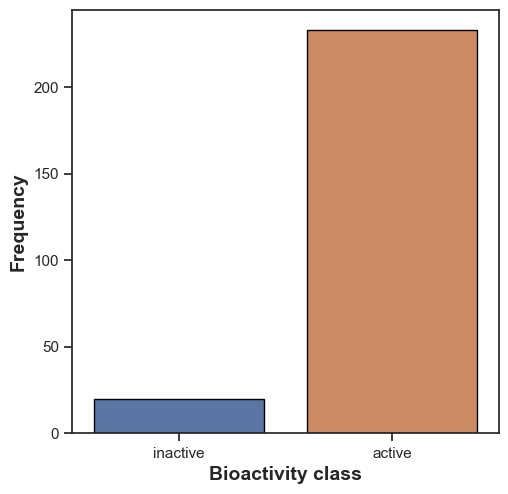

In [137]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

#plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

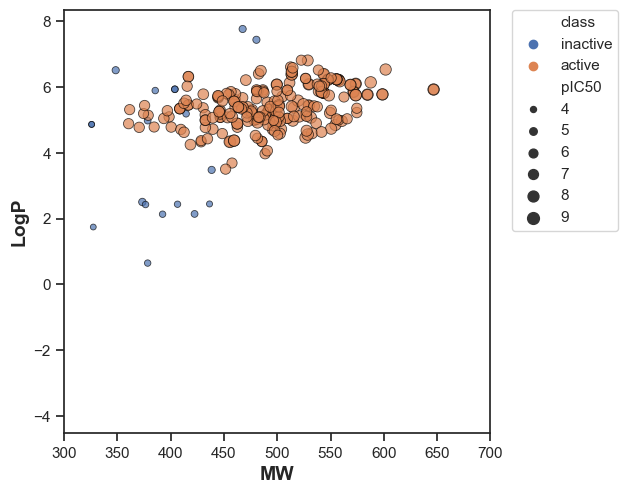

In [138]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.xlim(300, 700)  # Aquí limitamos el eje x a 1000 pq habia un punto raro

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
#plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

Text(0, 0.5, 'pIC50 value')

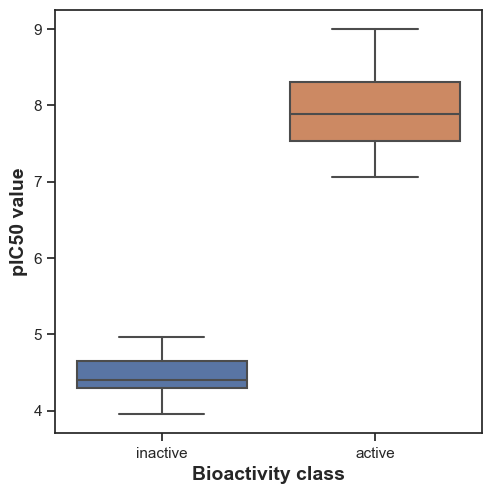

In [139]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

#plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [140]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class'] 
  df = df_2class[selection]
  active = df[df['class'] == 'active'] #class must be written this way because Python has it reserved
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive'] 
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [141]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,4660.0,1.137905e-13,0.05,Different distribution (reject H0)


#### **MW**

Text(0, 0.5, 'MW')

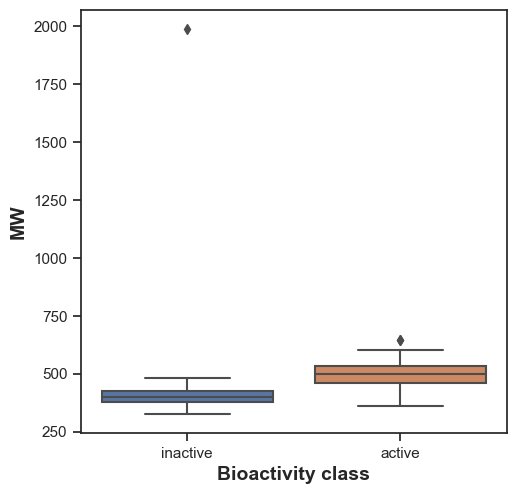

In [142]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

#plt.savefig('plot_MW.pdf')

In [143]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,4095.0,1.927787e-08,0.05,Different distribution (reject H0)


#### **LogP**

Text(0, 0.5, 'LogP')

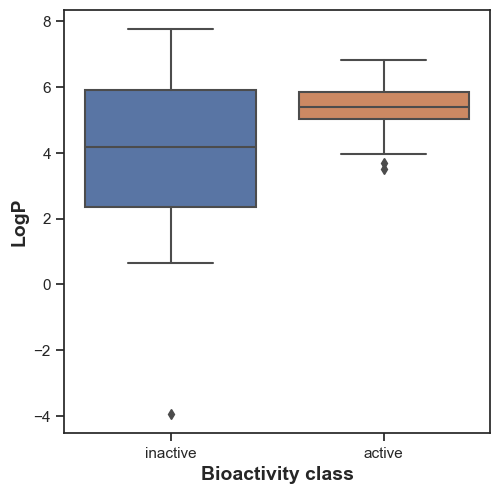

In [144]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

#plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [145]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,3196.0,0.005854,0.05,Different distribution (reject H0)


#### **NumHDonors**

Text(0, 0.5, 'NumHDonors')

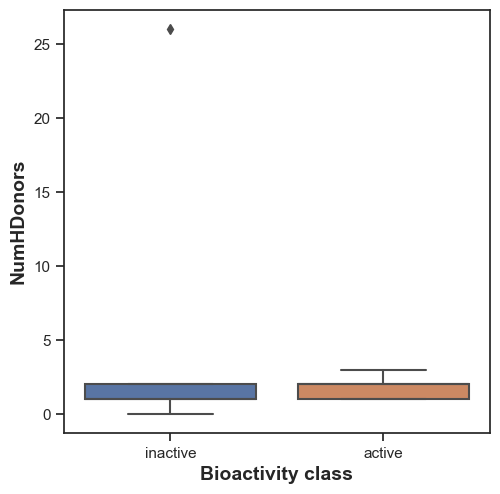

In [146]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

#plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [147]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,3110.0,0.005084,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

Text(0, 0.5, 'NumHAcceptors')

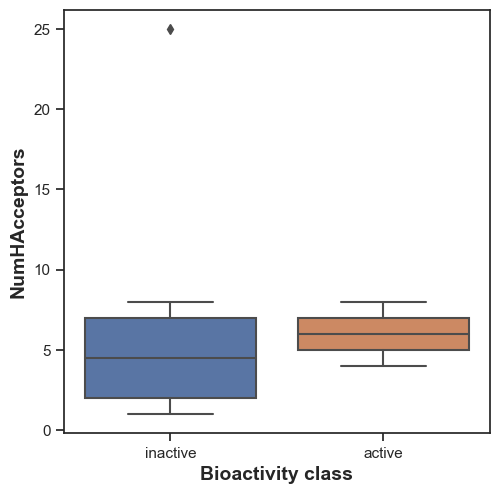

In [148]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

#plt.savefig('plot_NumHAcceptors.pdf')

In [149]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,3034.5,0.019673,0.05,Different distribution (reject H0)


### **Dispersion**

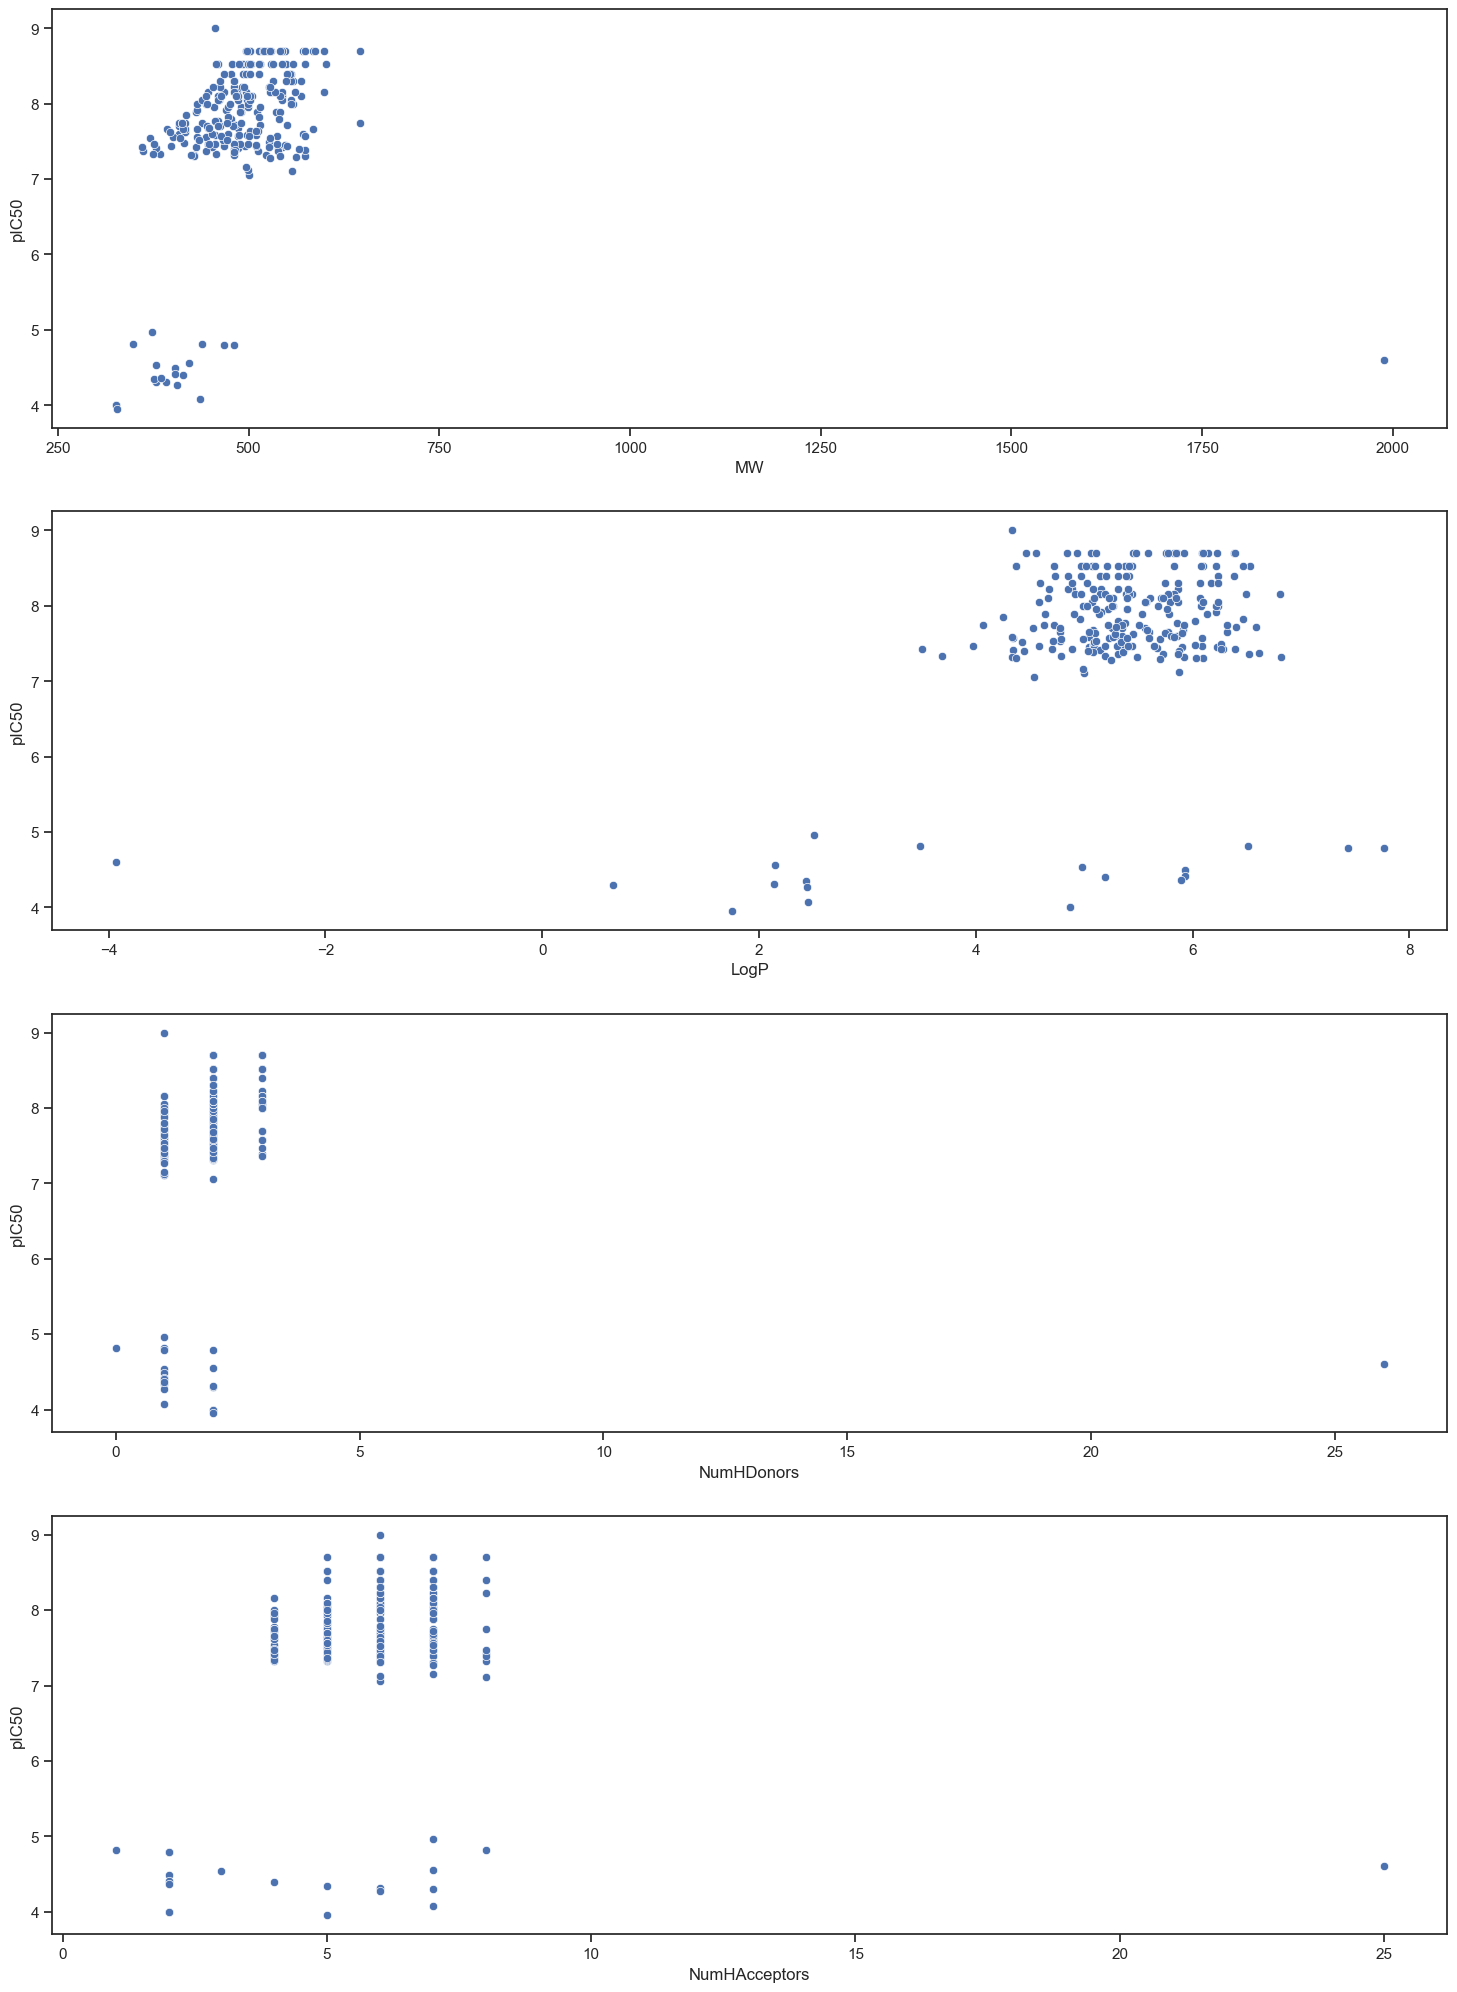

In [150]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

sns.scatterplot(x = df_2class['MW'], y = df_2class['pIC50'], ax=axs[0])
sns.scatterplot(x = df_2class['LogP'], y = df_2class['pIC50'], ax=axs[1])
sns.scatterplot(x = df_2class['NumHDonors'], y = df_2class['pIC50'], ax=axs[2])
sns.scatterplot(x = df_2class['NumHAcceptors'], y = df_2class['pIC50'], ax=axs[3])

plt.show()


### **Correlation**

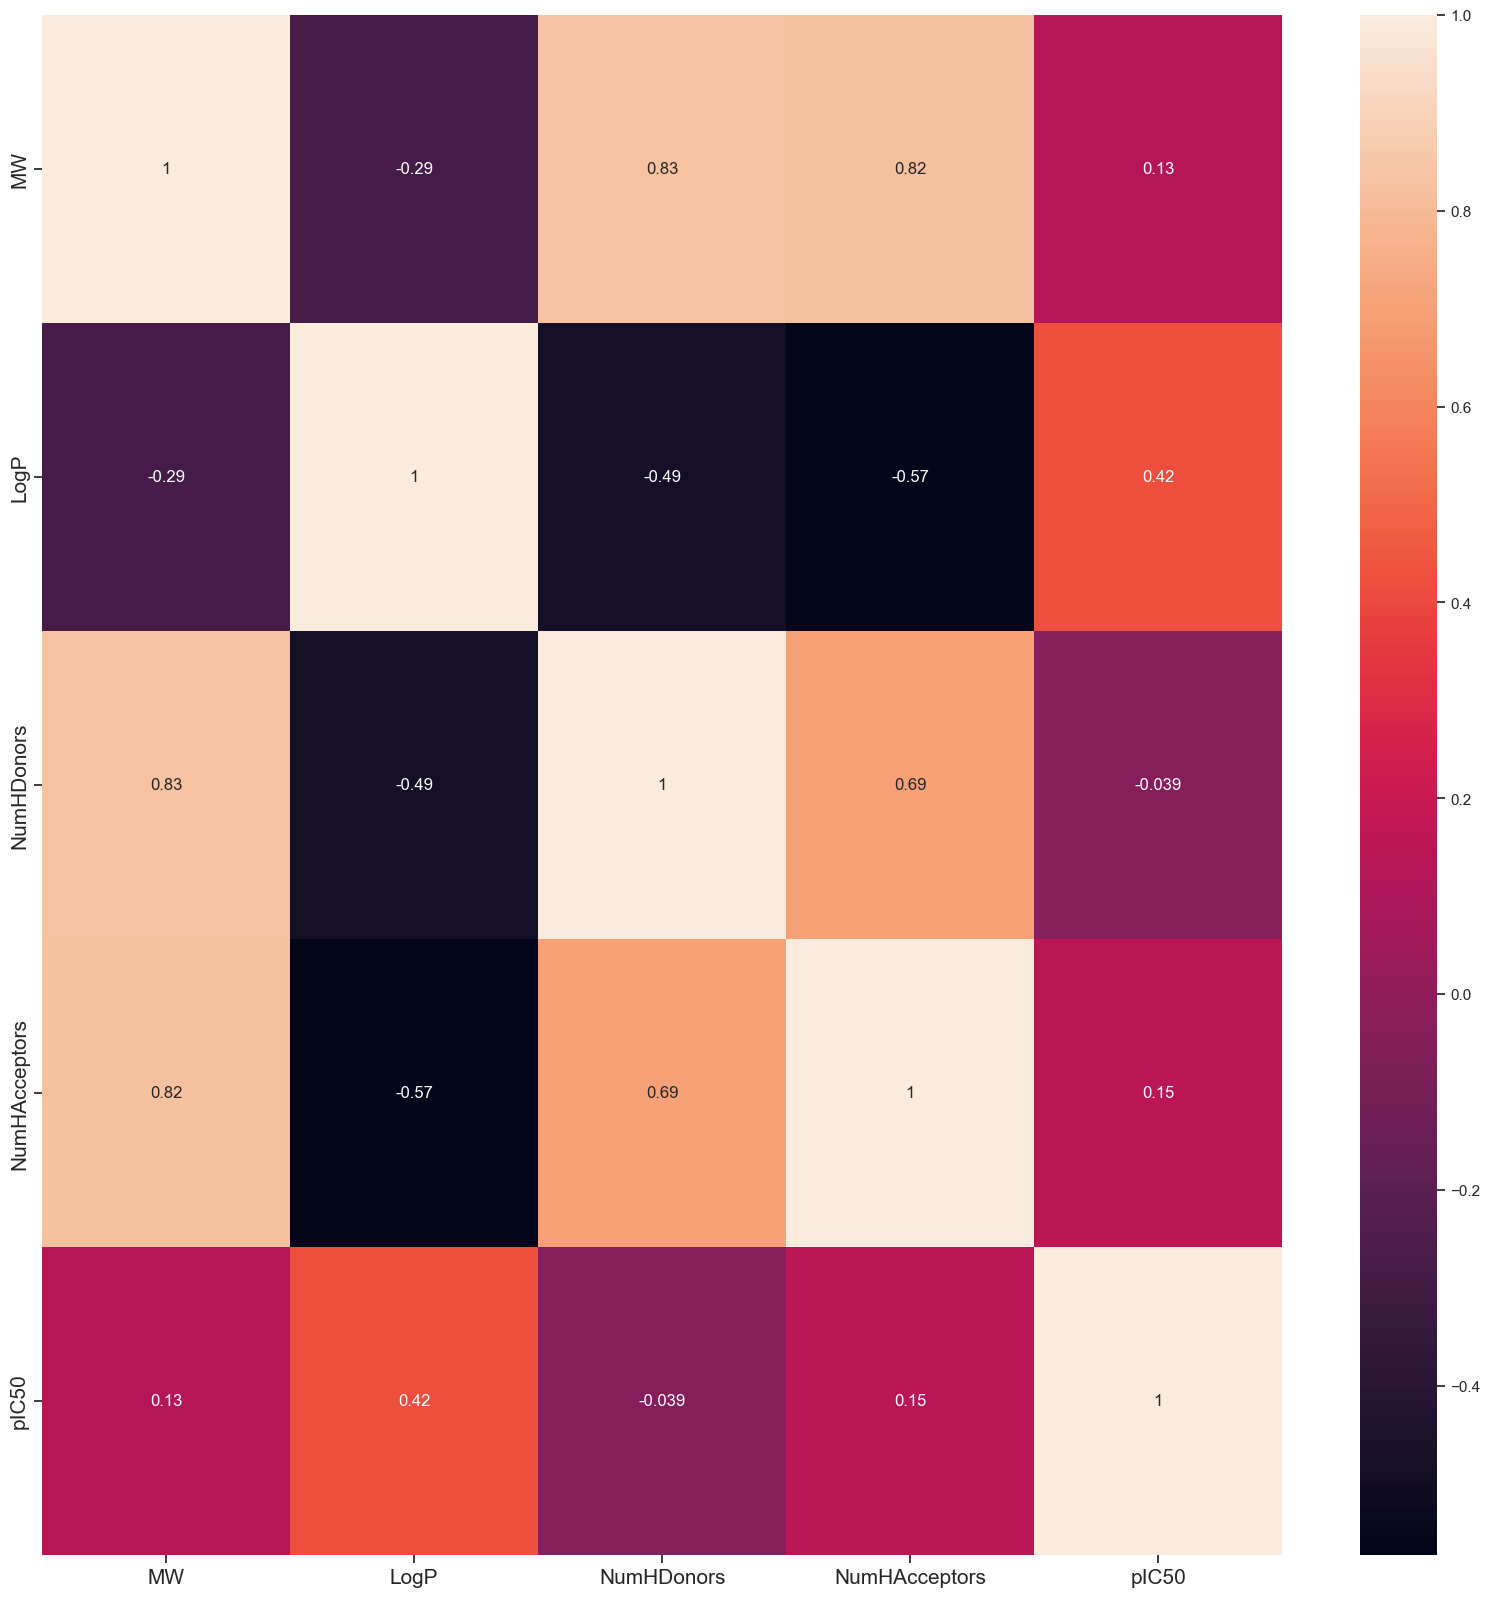

In [151]:
df_corr=df_2class.drop(columns=['molecule_chembl_id', 'canonical_smiles', 'class'])

correlation = df_corr.corr()
# Plot correlation
plt.figure(figsize=(20, 20))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### **Interpretation of Statistical Results**

##### **Box Plots**

##### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

##### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

#### **Correlation**

We can see how the Lipinski descriptor that most influences the pIC50 is LogP.

# **Visualize the structure of the top 10 most active molecules**


In [152]:
df_sorted = df_2class.sort_values('pIC50', ascending=False)
top_10=df_sorted.head(10)
top_10


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
57,CHEMBL4442809,Cc1cccc([C@@H](C)Nc2nc(C)nc3ccc(-c4ccn(CC(=O)N...,active,455.562,4.33664,1.0,6.0,9.00000
127,CHEMBL4584280,COCCN1CCN(C(=O)[C@H]2CC[C@H](c3cc4c(N[C@H](C)c...,active,646.730,5.92442,2.0,8.0,8.69897
98,CHEMBL4532163,COc1cc2nc(C)nc(N[C@H](C)c3cc(N)cc(C(F)(F)F)c3)...,active,501.553,5.44682,2.0,6.0,8.69897
150,CHEMBL4540213,Cc1nc(N[C@H](C)c2cc(N)cc(C(F)(F)F)c2)c2cc([C@H...,active,541.618,5.84492,2.0,6.0,8.69897
79,CHEMBL4593376,Cc1nc(N[C@H](C)c2cc(N)cc(C(F)(F)F)c2)c2cc([C@H...,active,543.634,5.82532,3.0,6.0,8.69897
40,CHEMBL4469357,COCC(=O)N1CCC(c2ccc3nc(C)nc(N[C@H](C)c4cc(N)cc...,active,501.553,5.06472,2.0,6.0,8.69897
129,CHEMBL4436505,COc1cc2nc(C)nc(N[C@H](C)c3cc(N)cc(C(F)(F)F)c3C...,active,543.634,6.39134,2.0,6.0,8.69897
125,CHEMBL4449981,COc1cc2nc(C)nc(N[C@H](C)c3cc(N)cc(C(F)(F)F)c3F...,active,547.597,6.22202,2.0,6.0,8.69897
121,CHEMBL4550769,COCCN1CCN(C(=O)[C@H]2CC[C@H](c3ccc4nc(C)nc(N[C...,active,598.714,5.77672,2.0,7.0,8.69897
23,CHEMBL4465802,COc1cc2nc(C)nc(N[C@H](C)c3cc(N)cc(C(F)(F)F)c3)...,active,571.644,5.85352,2.0,7.0,8.69897


In [153]:
#pip install rdkit-pypi
#pip install chembl_webresource_client

In [154]:
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt


<Figure size 640x480 with 0 Axes>

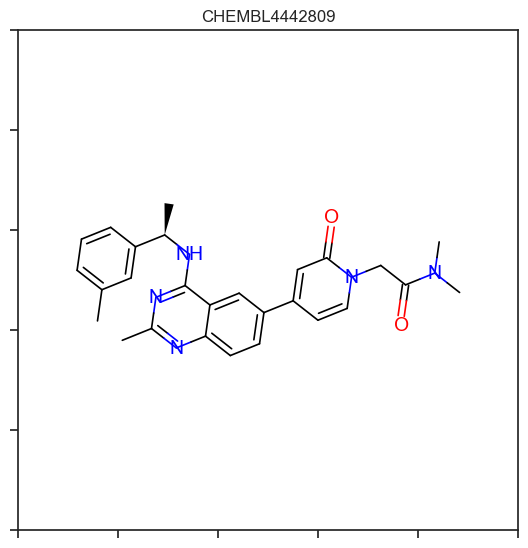

<Figure size 640x480 with 0 Axes>

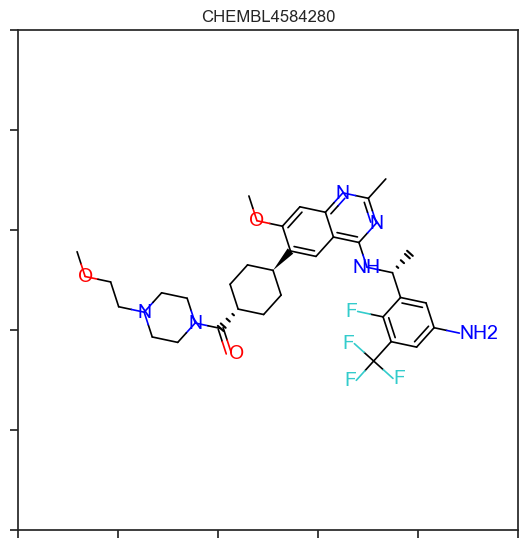

<Figure size 640x480 with 0 Axes>

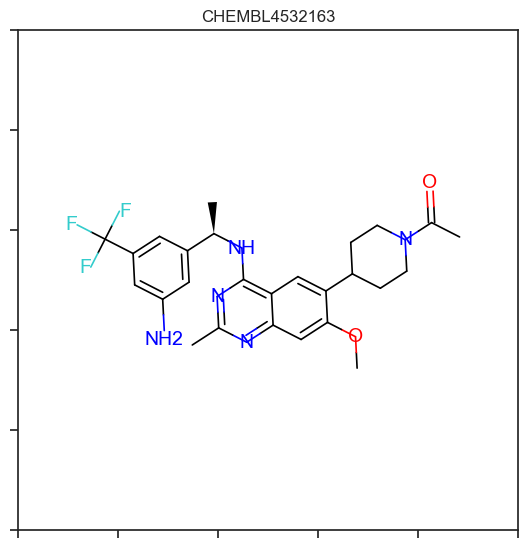

<Figure size 640x480 with 0 Axes>

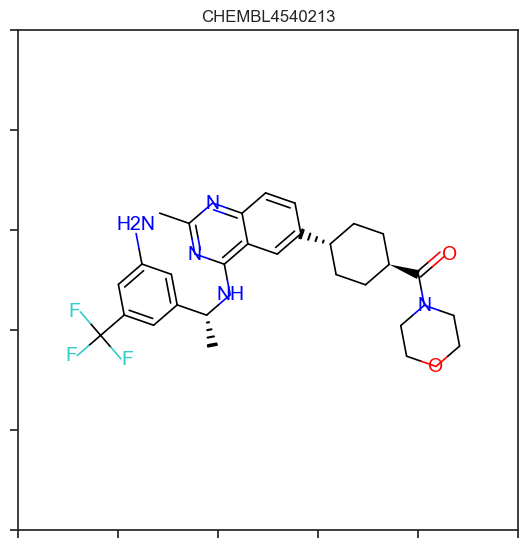

<Figure size 640x480 with 0 Axes>

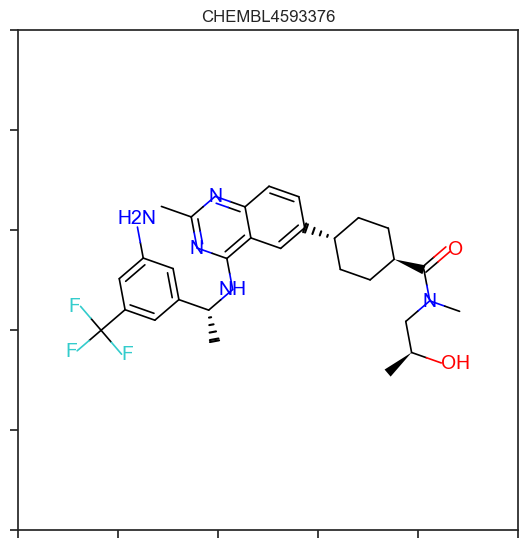

<Figure size 640x480 with 0 Axes>

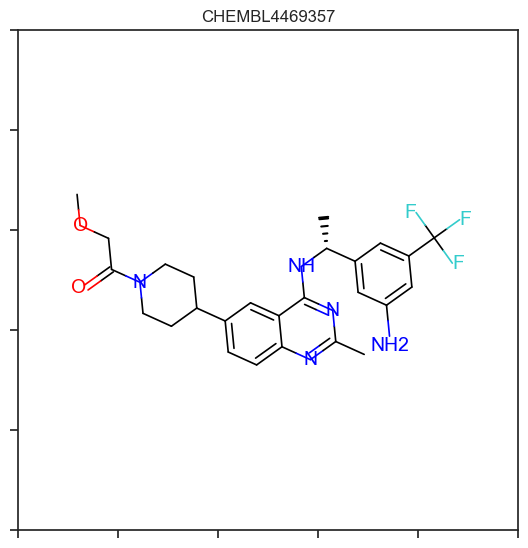

<Figure size 640x480 with 0 Axes>

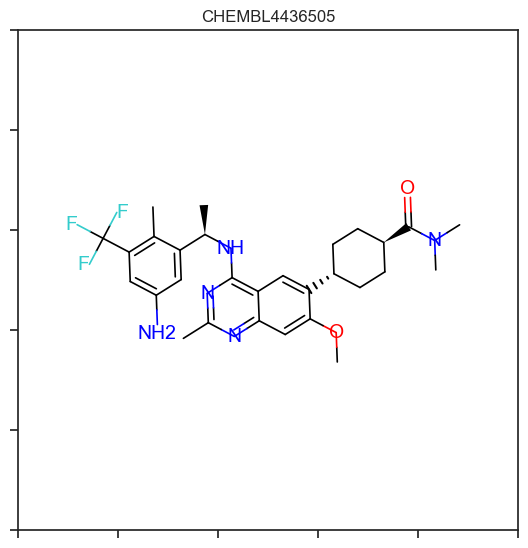

<Figure size 640x480 with 0 Axes>

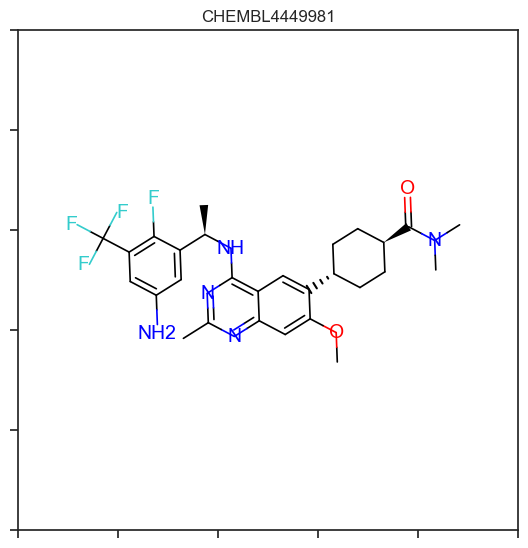

<Figure size 640x480 with 0 Axes>

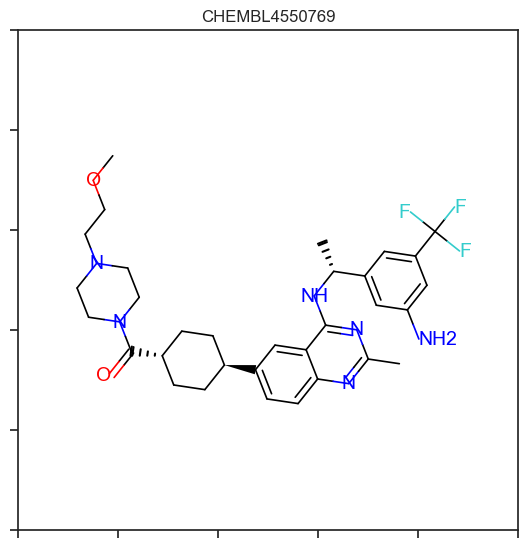

<Figure size 640x480 with 0 Axes>

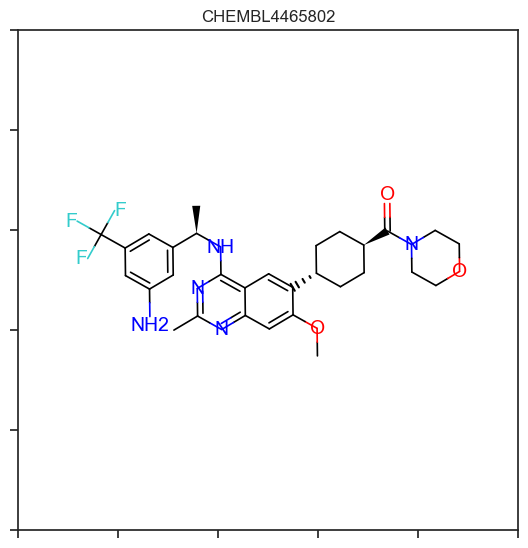

In [155]:
#graphic representation
for i, row in top_10.iterrows():
    smiles = row['canonical_smiles']
    mol = Chem.MolFromSmiles(smiles)
    chembl_id = row['molecule_chembl_id']
    
    plt.figure()
    Draw.MolToMPL(mol, size=(200,200))
    plt.title(chembl_id)
    plt.show()


In [156]:
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def all_graph(df):


    # Calculate the number of rows and columns for the graph
    n = len(df)
    ncols = 5
    nrows = n // ncols if n % ncols == 0 else n // ncols + 1

    fig, axs = plt.subplots(nrows, ncols, figsize=(80, 32*nrows/ncols))  
    axs = axs.flatten()

    for i, row in enumerate(df.itertuples()):
        smiles = row.canonical_smiles
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            chembl_id = row.molecule_chembl_id
            img = Draw.MolToImage(mol, size=(800,800))
            axs[i].imshow(np.array(img))
            axs[i].set_title(chembl_id)
            axs[i].axis('off')  
        else:
            print(f'Could not generate a molecule from the SMILES string: {smiles}')

    # Delete empty axes
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

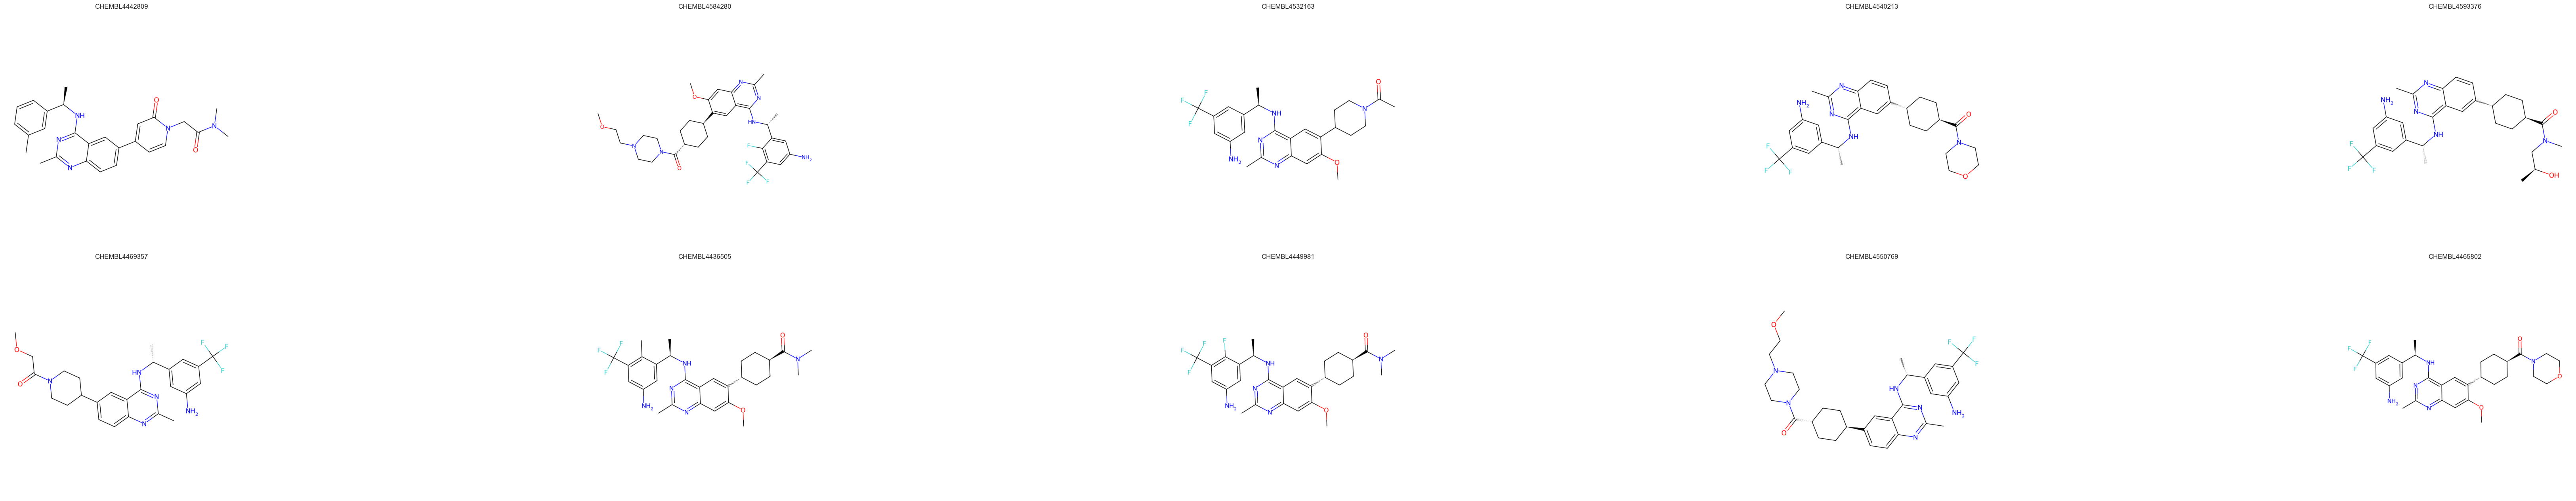

In [157]:
all_graph(top_10)

### **Create 5 analogues to the top 10**

In [158]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.rdchem import Atom

In [159]:
def create_analogues(molecules_dataframe):

    analog_df = molecules_dataframe[['molecule_chembl_id', 'canonical_smiles']].copy()

    dataframes = [analog_df]  # List to store the DataFrames

    for i, row in analog_df.iterrows():
        chembl_id = row['molecule_chembl_id']
        smiles = row['canonical_smiles']
        mol = Chem.MolFromSmiles(smiles)

        # Generate 5 analogs by replacing a carbon atom with a nitrogen atom
        for j in range(5):
            try:
                new_mol = Chem.RWMol(mol)
                atom_id = [atom.GetIdx() for atom in new_mol.GetAtoms() if atom.GetAtomicNum() == 6][j]  # Get the index of the carbon atom
                new_mol.GetAtomWithIdx(atom_id).SetAtomicNum(7)  # Replace the carbon atom with a nitrogen atom
                new_smiles = Chem.MolToSmiles(new_mol)
                new_chembl_id = chembl_id + '_analog_' + str(j+1)

                # Create a new DataFrame for the analog and add it to the list
                df = pd.DataFrame({'molecule_chembl_id': [new_chembl_id], 'canonical_smiles': [new_smiles]})
                dataframes.append(df)
            except Exception as e:
                print(f"Error when creating the analogue for the molecule {chembl_id}. Error: {str(e)}")
                continue

    # Concatenate all the DataFrames
    analog_df = pd.concat(dataframes, ignore_index=True)

    return analog_df


In [160]:
def sort_analogues (analog_df, analog_df_m1):

    # Create an empty list to store the reordered rows
    reordered_rows = []
    n=len(analog_df_m1)
    x=5
    # Loop through rows
    for i in range(n):
        # Add row i to the list as a DataFrame
        reordered_rows.append(analog_df.iloc[i:i+1])
        
        # Calculate the index of the first row to add after row i
        start = n+x*i 
        
        # Add the next 5 rows after row i
        for j in range(start, start + 5):
            reordered_rows.append(analog_df.iloc[j:j+1])
    
    # Create a new DataFrame with the reordered rows
    analog_df_sorted = pd.concat(reordered_rows)
    
    # Display the reordered DataFrame
    return analog_df_sorted


In [161]:
def analoges(molecules_dataframe):
    analog_df_created = create_analogues(molecules_dataframe)
    analog_df_sorted = sort_analogues(analog_df_created, molecules_dataframe)
    return analog_df_sorted


In [162]:
analog_df_sorted = analoges (top_10)
analog_df_sorted

,molecule_chembl_id,canonical_smiles
0,CHEMBL4442809,Cc1cccc([C@@H](C)Nc2nc(C)nc3ccc(-c4ccn(CC(=O)N...
10,CHEMBL4442809_analog_1,Cc1nc(N[C@H](C)c2cccc(N)c2)c2cc(-c3ccn(CC(=O)N...
11,CHEMBL4442809_analog_2,Cc1nc(N[C@H](C)c2cccn(C)c2)c2cc(-c3ccn(CC(=O)N...
12,CHEMBL4442809_analog_3,Cc1cc([C@@H](C)Nc2nc(C)nc3ccc(-c4ccn(CC(=O)N(C...
13,CHEMBL4442809_analog_4,Cc1cncc([C@@H](C)Nc2nc(C)nc3ccc(-c4ccn(CC(=O)N...
14,CHEMBL4442809_analog_5,Cc1ccnc([C@@H](C)Nc2nc(C)nc3ccc(-c4ccn(CC(=O)N...
1,CHEMBL4584280,COCCN1CCN(C(=O)[C@H]2CC[C@H](c3cc4c(N[C@H](C)c...
15,CHEMBL4584280_analog_1,COc1cc2nc(C)nc(N[C@H](C)c3cc(N)cc(C(F)(F)F)c3F...
16,CHEMBL4584280_analog_2,CONCN1CCN(C(=O)[C@H]2CC[C@H](c3cc4c(N[C@H](C)c...
17,CHEMBL4584280_analog_3,COCNN1CCN(C(=O)[C@H]2CC[C@H](c3cc4c(N[C@H](C)c...


In [163]:
def create_txt_file (name, df):
    with open(name, 'w') as f:
        # Recorrer cada fila del DataFrame
        for index, row in df.iterrows():
            # Escribir la columna 'canonical_smiles' y 'molecule_chembl_id' en el archivo
            f.write(str(row['canonical_smiles']) + ' ' + str(row['molecule_chembl_id']) + '\n')

In [164]:
create_txt_file ('top_10_analog.txt', analog_df_sorted)

## **Descriptor Calculation and Dataset Preparation**

#### **Download PaDEL-Descriptor**

In [165]:
#! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
#! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

In [166]:
#Alternative
import requests

urls = [
    'https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip',
    'https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh'
]

for url in urls:
    r = requests.get(url, allow_redirects=True)
    open(url.split('/')[-1], 'wb').write(r.content)


# you have to unzip the file

In [167]:
#! unzip padel.zip 

### **Load bioactivity data**

Download the curated ChEMBL bioactivity data that has been pre-processed from Parts 1 and 2 of this Bioinformatics Project series. Here we will be using the **bioactivity_data_3class_pIC50.csv** file that essentially contain the pIC50 values that we will be using for building a regression model.

In [168]:
df3 = pd.read_csv('sos_bioactivity_data_pi50.csv')

In [169]:
df3

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2086797,CC[C@H](C)[C@H](NC(=O)CN1C/C=C\CCC(=O)N[C@@H](...,inactive,1988.275,-3.93563,26.0,25.0,4.602060
1,CHEMBL1988909,O=C1Oc2ccccc2C(=O)/C1=C/N1C(=O)/C(=C/c2ccc([N+...,inactive,438.442,3.48180,0.0,8.0,4.812479
2,CHEMBL4530195,CC1=CC(=O)/C(=C/N2C(=O)/C(=C/c3cccc(O)c3)SC2=S...,inactive,373.411,2.50700,1.0,7.0,4.966576
3,CHEMBL4535780,NC(=O)C(=CN1C(=O)/C(=C/c2ccc([N+](=O)[O-])cc2)...,inactive,378.391,0.65050,2.0,7.0,4.301899
4,CHEMBL4547916,O=C1Oc2ccccc2C(=O)/C1=C\N1C(=O)/C(=C/c2ccccc2)...,inactive,376.393,2.43000,1.0,5.0,4.343902
...,...,...,...,...,...,...,...,...
248,CHEMBL5208418,Cc1nc(N[C@H](C)c2cccc(C(F)F)c2F)c2cc3c(cc2n1)O...,active,496.537,4.98470,1.0,7.0,7.154902
249,CHEMBL5184087,COCCN1CCN2c3cc4c(N[C@H](C)c5cccc(C(F)F)c5F)nc(...,active,515.580,5.10752,1.0,7.0,7.958607
250,CHEMBL5195849,Cc1nc(N[C@H](C)c2cccc(C(F)F)c2F)c2cc3c(cc2n1)O...,active,527.591,5.10752,1.0,7.0,7.537602
251,CHEMBL5185398,Cc1nc(N[C@H](C)c2cccc(C(F)F)c2F)c2cc3c(cc2n1)O...,active,537.590,5.39922,1.0,8.0,7.468521


In [170]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [171]:
#! cat molecule.smi | head -5

In [172]:
#! cat molecule.smi | wc -l

### **Calculate fingerprint descriptors**


### **Calculate PaDEL descriptors**

In [173]:
#To obtain descriptors_output.csv. If an error occurs, modify the path in the padel.sh file.

#! bash padel.sh

In [177]:
import subprocess

# you have to change the route 

## If an error occurs, correct the padel.sh file by adding the /padel folder to the path

In [180]:
subprocess.call(['C:/Program Files/Git/git-bash.exe', 'D:/Programar/Repositorios de GitHub/ic50prediction/padel.sh'])#use gitbash from windows
#edit the route

0

## **Preparing the X and Y Data Matrices**

### **X data matrix**

In [181]:
df3_1_X = pd.read_csv('descriptors_output.csv')

In [182]:
df3_1_X.to_csv('descriptors_output_ml.csv', index=False)

In [183]:
df3_X = pd.read_csv('descriptors_output_ml.csv')

In [184]:
df3_X 

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL4535780,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL4530195,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL4521440,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL4547916,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL1988909,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,CHEMBL5208418,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
249,CHEMBL5184087,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
250,CHEMBL5195849,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251,CHEMBL5185398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [185]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
249,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
250,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
251,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## **Y variable**

### **Convert IC50 to pIC50**

In [186]:
df3_Y = df3['pIC50']
df3_Y

0      4.602060
1      4.812479
2      4.966576
3      4.301899
4      4.343902
         ...   
248    7.154902
249    7.958607
250    7.537602
251    7.468521
252    7.275724
Name: pIC50, Length: 253, dtype: float64

## **Combining X and Y variable**

In [187]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.602060
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.812479
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.966576
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301899
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.343902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.154902
249,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.958607
250,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.537602
251,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.468521


In [188]:
dataset3.to_csv('sos_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

## **Compare several ML algorithms for build regression models of inhibitors**



### **Import libraries**

In [189]:
#!python -m pip install lazypredict

In [190]:
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

### **Load the data set**


In [191]:
df = pd.read_csv('sos_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [192]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

### **Data pre-processing**

In [193]:
# Examine X dimension
X.shape

(253, 881)

In [194]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(253, 80)

In [195]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **Compare ML algorithms**

In [196]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

  7%|▋         | 3/42 [00:00<00:02, 14.00it/s]

100%|██████████| 42/42 [00:04<00:00,  8.57it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 240
[LightGBM] [Info] Number of data points in the train set: 202, number of used features: 80
[LightGBM] [Info] Start training from score 7.715993
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

100%|██████████| 42/42 [00:04<00:00,  9.16it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000286 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 240
[LightGBM] [Info] Number of data points in the train set: 202, number of used features: 80
[LightGBM] [Info] Start training from score 7.715993
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [197]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.96,0.97,0.15,0.03
ExtraTreeRegressor,0.96,0.97,0.15,0.03
ExtraTreesRegressor,0.96,0.97,0.15,0.69
GaussianProcessRegressor,0.96,0.97,0.15,0.04
XGBRegressor,0.96,0.97,0.15,0.10
BaggingRegressor,0.91,0.95,0.22,0.06
RandomForestRegressor,0.91,0.95,0.22,0.69
GradientBoostingRegressor,0.89,0.94,0.24,0.15
SVR,0.81,0.89,0.32,0.02


In [198]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,239568943392277647590867158958080.00,-143741366035366588554520295374848.00,15430621076493520.00,0.02
RANSACRegressor,4111841123485754387857408.00,-2467104674091452417966080.00,2021558487126.05,0.15
KernelRidge,58.16,-33.30,7.54,0.02
GaussianProcessRegressor,33.19,-18.32,5.66,0.02
LassoLars,2.75,-0.05,1.32,0.01
DummyRegressor,2.75,-0.05,1.32,0.03
Lasso,2.75,-0.05,1.32,0.01
ElasticNet,2.75,-0.05,1.32,0.03
LarsCV,1.97,0.42,0.98,0.14


## **Data visualization of model performance**

[(0.0, 1.0)]

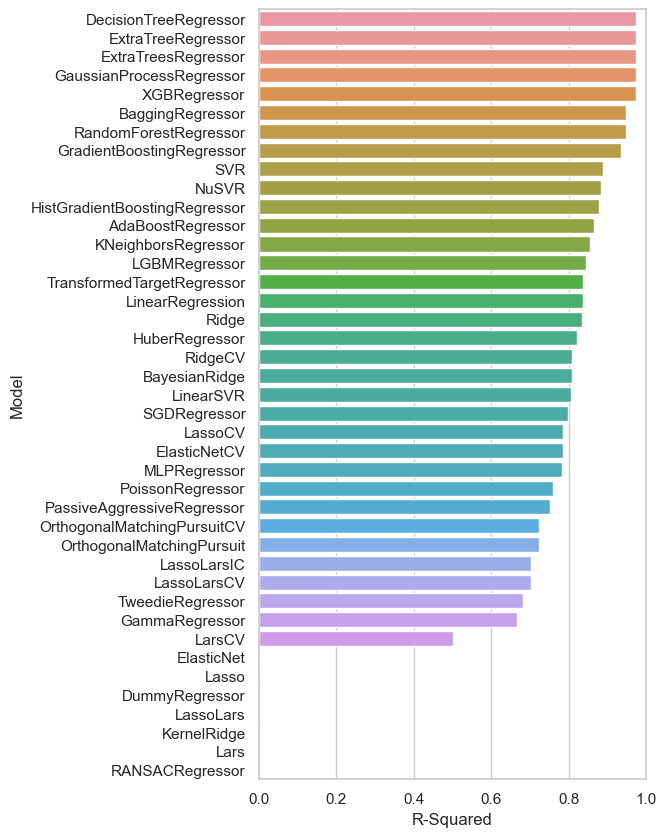

In [199]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

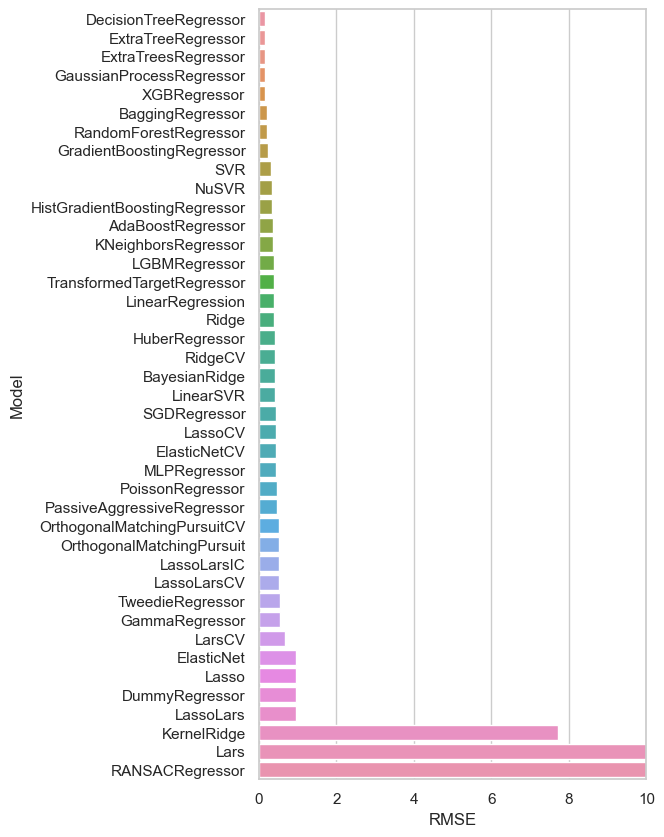

In [200]:
# Bar plot of RMSE values

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

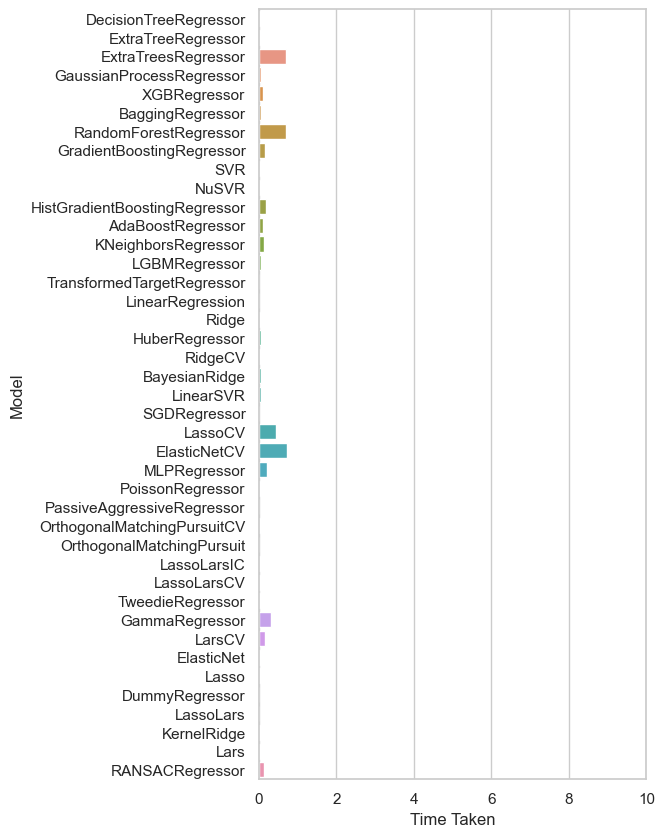

In [201]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

In [202]:
print(models_train)


                                         Adjusted R-Squared  \
Model                                                         
DecisionTreeRegressor                                  0.96   
ExtraTreeRegressor                                     0.96   
ExtraTreesRegressor                                    0.96   
GaussianProcessRegressor                               0.96   
XGBRegressor                                           0.96   
BaggingRegressor                                       0.91   
RandomForestRegressor                                  0.91   
GradientBoostingRegressor                              0.89   
SVR                                                    0.81   
NuSVR                                                  0.80   
HistGradientBoostingRegressor                          0.80   
AdaBoostRegressor                                      0.78   
KNeighborsRegressor                                    0.76   
LGBMRegressor                                          

# **Create and save an accurated model**

With the information above we can select a model that fits our interests.

# **QSAR Model Building of Inhibitors**

# Read in data

In [203]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [204]:
dataset_dir = 'sos_06_bioactivity_data_3class_pIC50_pubchem_fp.csv'
dataset = pd.read_csv(dataset_dir)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.60
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.81
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.97
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.15
249,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.96
250,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.54
251,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.47


In [205]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
249,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
250,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
251,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [206]:
Y = dataset.iloc[:,-1]
Y

0     4.60
1     4.81
2     4.97
3     4.30
4     4.34
      ... 
248   7.15
249   7.96
250   7.54
251   7.47
252   7.28
Name: pIC50, Length: 253, dtype: float64

### Remove low variance features

In [207]:
#from sklearn.feature_selection import VarianceThreshold

#def remove_low_variance(input_data, threshold=0.1):
#    selection = VarianceThreshold(threshold)
#    selection.fit(input_data)
#    return input_data[input_data.columns[selection.get_support(indices=True)]]

#X = remove_low_variance(X, threshold=0.1)
#X

### Data split (80/20 ratio)

In [208]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [209]:
X_train.shape, Y_train.shape

((202, 881), (202,))

In [210]:
X_test.shape, Y_test.shape

((51, 881), (51,))

# Random Forest Regression Model

In [211]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [212]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.8284822440129248

## Model Prediction

In [213]:
Y_pred = model.predict(X_test)
Y_pred

array([8.17263001, 7.90853055, 8.0720534 , 8.31611326, 7.55206243,
       8.14096641, 8.29110112, 8.25927536, 7.61534892, 8.05838413,
       7.85426293, 8.2164336 , 4.5763341 , 7.94570717, 8.35778537,
       7.68142818, 7.52643704, 7.42531615, 8.17263001, 8.25208041,
       7.94807981, 7.68095319, 7.86192328, 8.19028192, 8.19029612,
       8.55736865, 8.05797933, 7.48933896, 7.64410624, 7.6858355 ,
       7.95259509, 4.500586  , 7.66630959, 8.25803029, 7.74545675,
       7.58448804, 8.13201204, 7.72552111, 7.56574247, 7.64419858,
       7.59713895, 8.31862072, 8.02997848, 7.97830066, 4.36734729,
       8.23936785, 8.37865651, 5.08459689, 7.68964321, 8.03822419,
       7.70468779])

## Model Performance

In [214]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Mean squared error (MSE): 0.20
Coefficient of determination (R^2): 0.83


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

Text(0.5, 0, 'Experimental pIC50')

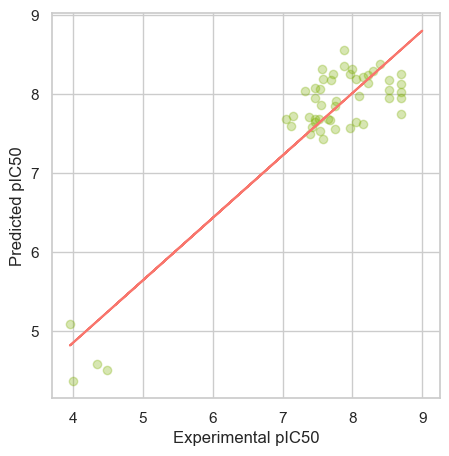

In [215]:
import numpy as np
plt.figure(figsize=(5,5))
plt.scatter(x=Y_test, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y_test, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [216]:
import pickle

In [217]:
pickle.dump(model, open('sos_model.pkl', 'wb'))

# **Predict pIC50 for our analogs**

In [218]:
import subprocess

In [219]:
def load_data_df_and_prediction(file_molecules):
    load_data = pd.read_table(file_molecules, sep=' ', header=None)
    load_data.to_csv('molecule.smi', sep = '\t', header = False, index = False)
    subprocess.call(['C:/Program Files/Git/git-bash.exe', 'D:/Programar/portfolio/bioactivity_prediction/padel.sh'])#use gitbash from windows
    df = pd.read_csv('descriptors_output.csv')
    df = df.drop(columns=['Name'])
    load_model = pickle.load(open('sos_model.pkl', 'rb'))
    prediction = load_model.predict(df)
    prediction_output = pd.Series(prediction, name='pIC50')
    molecule_name = pd.Series(load_data[1], name='molecule_name')
    df = pd.concat([molecule_name, prediction_output], axis=1)
    return df


In [220]:
# Load the txt file of our analogues or other molecules that we want to calculate their pIC50
df=load_data_df_and_prediction('top_10_analog.txt')

# **These are the pIC50 values for each analogue**

In [221]:
df

,molecule_name,pIC50
0,CHEMBL4442809,7.45
1,CHEMBL4442809_analog_1,7.48
2,CHEMBL4442809_analog_2,7.48
3,CHEMBL4442809_analog_3,7.48
4,CHEMBL4442809_analog_4,7.65
5,CHEMBL4442809_analog_5,7.45
6,CHEMBL4584280,8.60
7,CHEMBL4584280_analog_1,8.57
8,CHEMBL4584280_analog_2,8.56
9,CHEMBL4584280_analog_3,8.53


# **Resume**

In [222]:
def resume_better_analogues(df):
    
    n = len(df)

    for i in range(0, n, 6):
        reference_value = df.iloc[i, 1]
        reference_name = df.iloc[i, 0]
        
        for j in range(i + 1, i + 6):
            if j < len(df):
                current_value = df.iloc[j, 1]
                current_name = df.iloc[j, 0]
                
                if current_value > reference_value:
                    difference = current_value - reference_value
                    print(f'This {current_name} has a higher pIC50 than its original molecule {reference_name} with a value of {current_value}, with a difference of {difference}')

def good_analog_df (df, reference_df):

    n = len(df)

    higher_list = []

    for i in range(0, n, 6):
        reference_value = df.iloc[i, 1]
        reference_name = df.iloc[i, 0]
        for j in range(i+1, i+6):
            if j < len(df):
                current_value = df.iloc[j, 1]
                current_name = df.iloc[j, 0]
                if current_value > reference_value:
                    higher_list.append(current_name)

    good_analog_df = reference_df[reference_df.iloc[:, 0].isin(higher_list)]

    return good_analog_df    

In [223]:
resume_better_analogues(df)

This CHEMBL4442809_analog_1 has a higher pIC50 than its original molecule CHEMBL4442809 with a value of 7.475046457572437, with a difference of 0.026878658047083448
This CHEMBL4442809_analog_2 has a higher pIC50 than its original molecule CHEMBL4442809 with a value of 7.475046457572437, with a difference of 0.026878658047083448
This CHEMBL4442809_analog_3 has a higher pIC50 than its original molecule CHEMBL4442809 with a value of 7.475046457572437, with a difference of 0.026878658047083448
This CHEMBL4442809_analog_4 has a higher pIC50 than its original molecule CHEMBL4442809 with a value of 7.647348014409134, with a difference of 0.19918021488378113
This CHEMBL4442809_analog_5 has a higher pIC50 than its original molecule CHEMBL4442809 with a value of 7.449162274237825, with a difference of 0.0009944747124714937
This CHEMBL4532163_analog_1 has a higher pIC50 than its original molecule CHEMBL4532163 with a value of 8.597226093005654, with a difference of 0.1467888793068557
This CHEMBL4

In [224]:
good_analog_df_1=good_analog_df(df, analog_df_sorted)
good_analog_df_1

,molecule_chembl_id,canonical_smiles
10,CHEMBL4442809_analog_1,Cc1nc(N[C@H](C)c2cccc(N)c2)c2cc(-c3ccn(CC(=O)N...
11,CHEMBL4442809_analog_2,Cc1nc(N[C@H](C)c2cccn(C)c2)c2cc(-c3ccn(CC(=O)N...
12,CHEMBL4442809_analog_3,Cc1cc([C@@H](C)Nc2nc(C)nc3ccc(-c4ccn(CC(=O)N(C...
13,CHEMBL4442809_analog_4,Cc1cncc([C@@H](C)Nc2nc(C)nc3ccc(-c4ccn(CC(=O)N...
14,CHEMBL4442809_analog_5,Cc1ccnc([C@@H](C)Nc2nc(C)nc3ccc(-c4ccn(CC(=O)N...
20,CHEMBL4532163_analog_1,CC(=O)N1CCC(c2cc3c(N[C@H](C)c4cc(N)cc(C(F)(F)F...
21,CHEMBL4532163_analog_2,COn1cc2nc(C)nc(N[C@H](C)c3cc(N)cc(C(F)(F)F)c3)...
26,CHEMBL4540213_analog_2,C[C@@H](Nc1nn(C)nc2ccc([C@H]3CC[C@H](C(=O)N4CC...
27,CHEMBL4540213_analog_3,Cc1nc2ccc([C@H]3CC[C@H](C(=O)N4CCOCC4)CC3)cc2n...
28,CHEMBL4540213_analog_4,Cc1nc(N[N@H](C)c2cc(N)cc(C(F)(F)F)c2)c2cc([C@H...


In [225]:
#show both the originals and good analogues
def create_draw_df(good_analoges):
    substrings = [name[:13] for name in good_analoges.iloc[:, 0]]
    matching_df = analog_df_sorted[analog_df_sorted.iloc[:, 0].str[:13].isin(substrings)]
    originals_rows = [0, 6] + list(range(0, len(matching_df), 6))
    originals = matching_df.iloc[originals_rows]
    draw_df=pd.concat([originals,good_analoges],axis=0)
    return draw_df

In [226]:
draw_df_1=create_draw_df (good_analog_df_1)

[18:55:13] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 13


Could not generate a molecule from the SMILES string: Cc1nc(N[C@H](C)c2cccn(C)c2)c2cc(-c3ccn(CC(=O)N(C)C)c(=O)c3)ccc2n1


[18:55:14] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 24 25 26
[18:55:14] Can't kekulize mol.  Unkekulized atoms: 3 4 7 8 9 10 11 26 27
[18:55:14] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 21 22 38
[18:55:14] Explicit valence for atom # 5 N, 4, is greater than permitted
[18:55:14] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 25 26 27


Could not generate a molecule from the SMILES string: COn1cc2nc(C)nc(N[C@H](C)c3cc(N)cc(C(F)(F)F)c3)c2cc1C1CCN(C(C)=O)CC1
Could not generate a molecule from the SMILES string: C[C@@H](Nc1nn(C)nc2ccc([C@H]3CC[C@H](C(=O)N4CCOCC4)CC3)cc12)c1cc(N)cc(C(F)(F)F)c1
Could not generate a molecule from the SMILES string: Cc1nc2ccc([C@H]3CC[C@H](C(=O)N4CCOCC4)CC3)cc2n(N[C@H](C)c2cc(N)cc(C(F)(F)F)c2)n1
Could not generate a molecule from the SMILES string: Cc1nc(N[N@H](C)c2cc(N)cc(C(F)(F)F)c2)c2cc([C@H]3CC[C@H](C(=O)N4CCOCC4)CC3)ccc2n1
Could not generate a molecule from the SMILES string: COn1cc2nc(C)nc(N[C@H](C)c3cc(N)cc(C(F)(F)F)c3F)c2cc1[C@H]1CC[C@H](C(=O)N(C)C)CC1


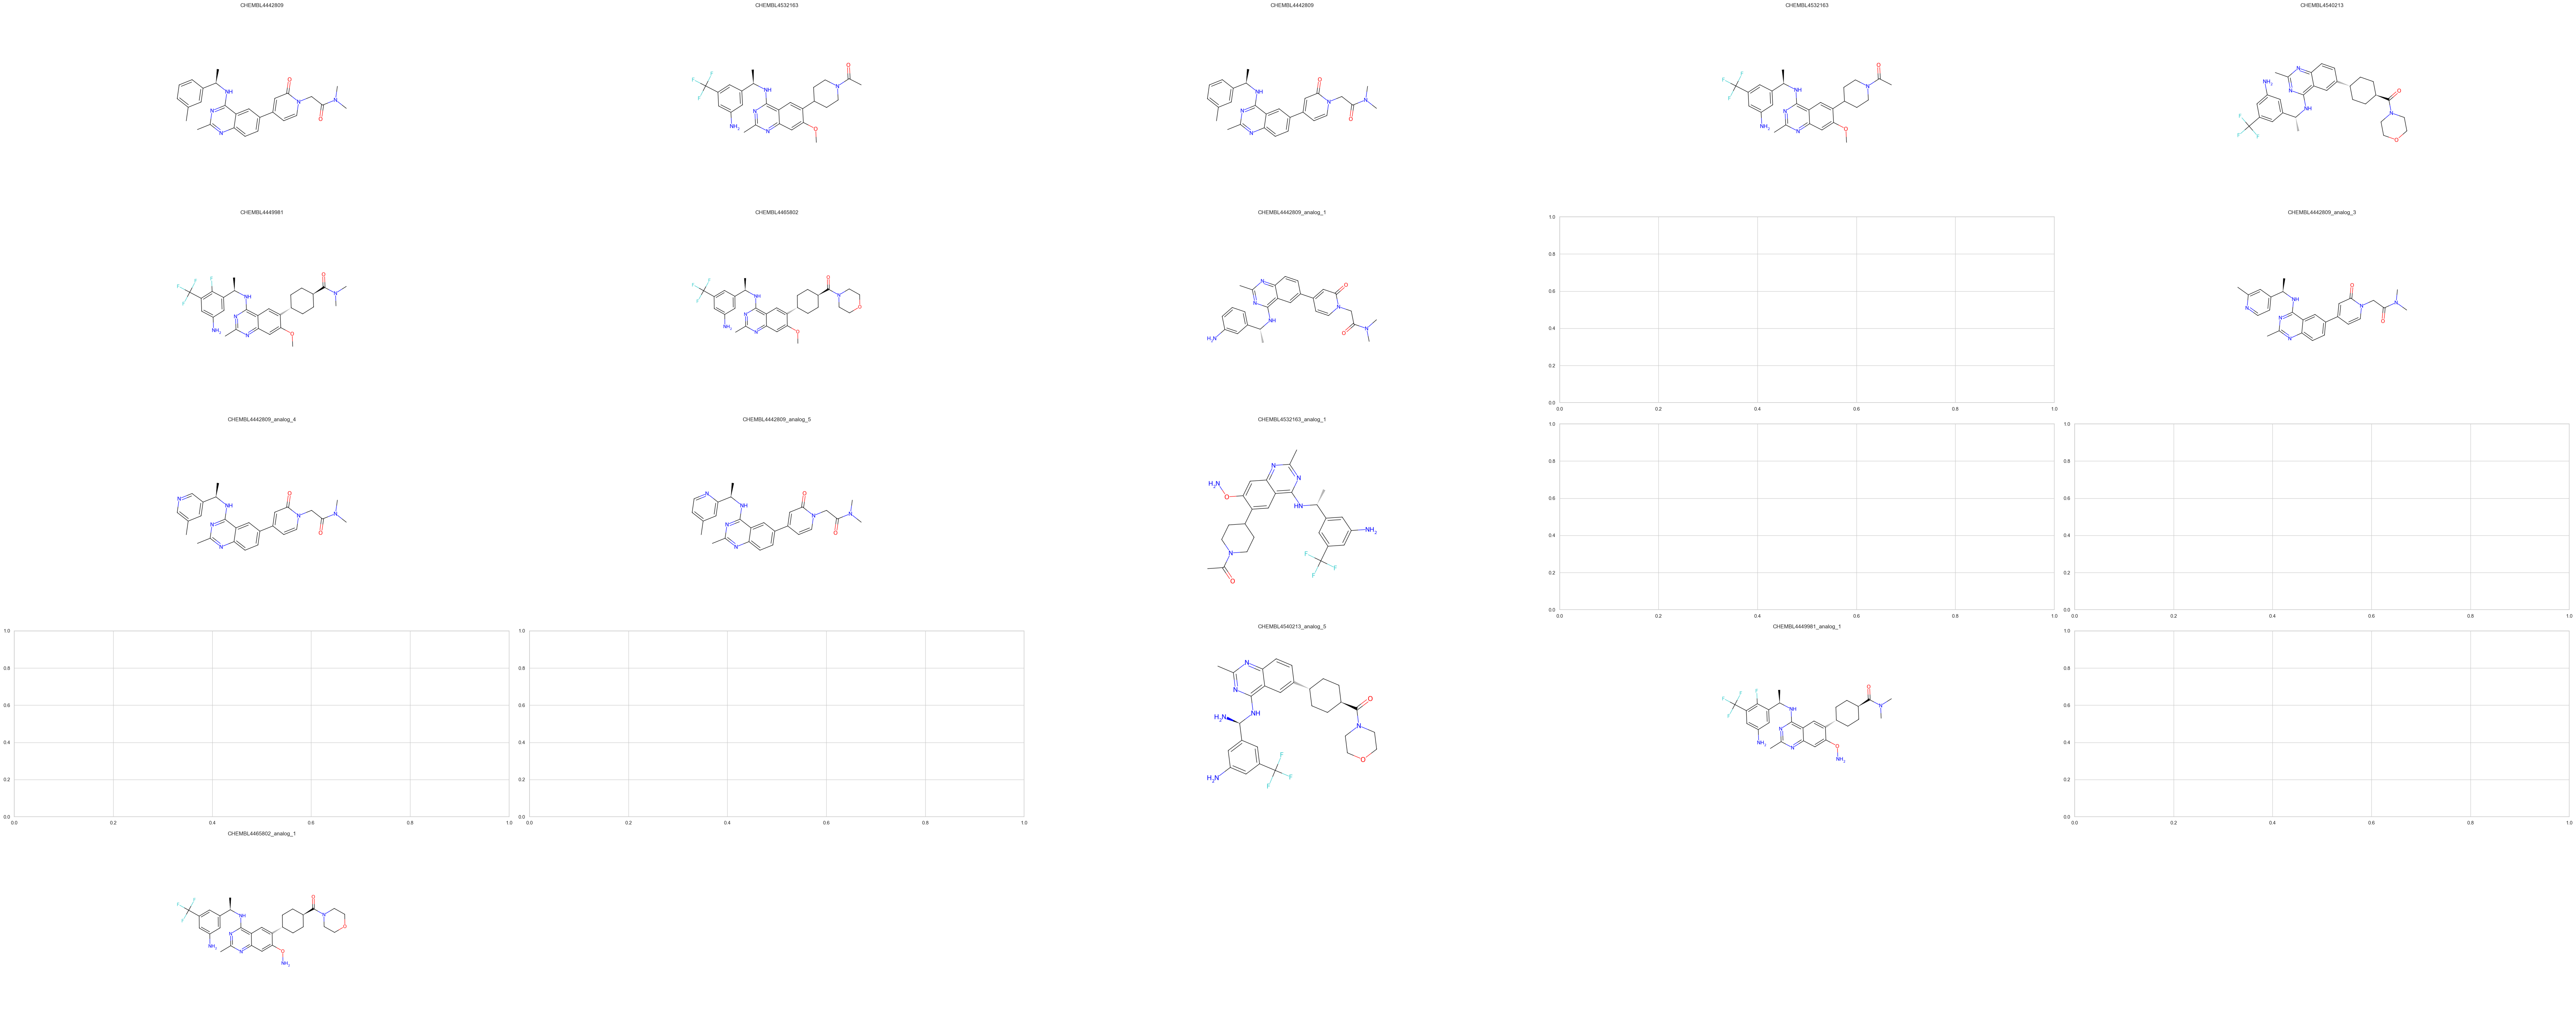

In [227]:
all_graph (draw_df_1)

## **Feedback from analogues**

In [228]:
analog_df_2 = analoges (good_analog_df_1)
analog_df_2.head(50)

Error when creating the analogue for the molecule CHEMBL4442809_analog_2. Error: Python argument types in
    RWMol.__init__(RWMol, NoneType)
did not match C++ signature:
    __init__(struct _object * __ptr64, class RDKit::ROMol mol, bool quickCopy=False, int confId=-1)
    __init__(struct _object * __ptr64, class std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> > pklString, unsigned int propertyFlags)
    __init__(struct _object * __ptr64, class std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> > pklString)
    __init__(struct _object * __ptr64)
    __init__(struct _object * __ptr64, class RDKit::ROMol)
Error when creating the analogue for the molecule CHEMBL4442809_analog_2. Error: Python argument types in
    RWMol.__init__(RWMol, NoneType)
did not match C++ signature:
    __init__(struct _object * __ptr64, class RDKit::ROMol mol, bool quickCopy=False, int confId=-1)
    __init__(struct _object * __ptr64, class std::basic_

[18:55:23] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 13
[18:55:23] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 24 25 26
[18:55:23] Can't kekulize mol.  Unkekulized atoms: 3 4 7 8 9 10 11 26 27
[18:55:23] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 21 22 38
[18:55:23] Explicit valence for atom # 5 N, 4, is greater than permitted
[18:55:23] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 25 26 27


,molecule_chembl_id,canonical_smiles
0,CHEMBL4442809_analog_1,Cc1nc(N[C@H](C)c2cccc(N)c2)c2cc(-c3ccn(CC(=O)N...
14,CHEMBL4442809_analog_1_analog_1,C[C@@H](Nc1nc(N)nc2ccc(-c3ccn(CC(=O)N(C)C)c(=O...
15,CHEMBL4442809_analog_1_analog_2,C[C@@H](Nc1nn(C)nc2ccc(-c3ccn(CC(=O)N(C)C)c(=O...
16,CHEMBL4442809_analog_1_analog_3,Cc1nc2ccc(-c3ccn(CC(=O)N(C)C)c(=O)c3)cc2n(N[C@...
17,CHEMBL4442809_analog_1_analog_4,Cc1nc(N[N@H](C)c2cccc(N)c2)c2cc(-c3ccn(CC(=O)N...
18,CHEMBL4442809_analog_1_analog_5,Cc1nc(N[C@H](N)c2cccc(N)c2)c2cc(-c3ccn(CC(=O)N...
1,CHEMBL4442809_analog_2,Cc1nc(N[C@H](C)c2cccn(C)c2)c2cc(-c3ccn(CC(=O)N...
19,CHEMBL4442809_analog_3_analog_1,Cc1nc(N[C@H](C)c2ccnc(N)c2)c2cc(-c3ccn(CC(=O)N...
20,CHEMBL4442809_analog_3_analog_2,Cc1nc(N[C@H](C)c2ccnn(C)c2)c2cc(-c3ccn(CC(=O)N...
21,CHEMBL4442809_analog_3_analog_3,Cc1nccc([C@@H](C)Nc2nc(C)nc3ccc(-c4ccn(CC(=O)N...


In [229]:
create_txt_file('feedback_1_analog.txt', analog_df_2)

In [230]:
df=load_data_df_and_prediction('feedback_1_analog.txt')
df.head(50)

,molecule_name,pIC50
0,CHEMBL4442809_analog_1,7.45
1,CHEMBL4442809_analog_1_analog_1,7.48
2,CHEMBL4442809_analog_1_analog_2,7.52
3,CHEMBL4442809_analog_1_analog_3,7.46
4,CHEMBL4442809_analog_1_analog_4,6.48
5,CHEMBL4442809_analog_1_analog_5,7.65
6,CHEMBL4442809_analog_2,6.06
7,CHEMBL4442809_analog_3_analog_1,7.65
8,CHEMBL4442809_analog_3_analog_2,7.46
9,CHEMBL4442809_analog_3_analog_3,7.46


In [231]:
resume_better_analogues(df)

This CHEMBL4442809_analog_1_analog_1 has a higher pIC50 than its original molecule CHEMBL4442809_analog_1 with a value of 7.475046457572437, with a difference of 0.026878658047083448
This CHEMBL4442809_analog_1_analog_2 has a higher pIC50 than its original molecule CHEMBL4442809_analog_1 with a value of 7.515534563257576, with a difference of 0.06736676373222306
This CHEMBL4442809_analog_1_analog_3 has a higher pIC50 than its original molecule CHEMBL4442809_analog_1 with a value of 7.455358299782045, with a difference of 0.0071905002566916565
This CHEMBL4442809_analog_1_analog_5 has a higher pIC50 than its original molecule CHEMBL4442809_analog_1 with a value of 7.647348014409134, with a difference of 0.19918021488378113
This CHEMBL4442809_analog_3_analog_1 has a higher pIC50 than its original molecule CHEMBL4442809_analog_2 with a value of 7.647348014409134, with a difference of 1.5864972874354493
This CHEMBL4442809_analog_3_analog_2 has a higher pIC50 than its original molecule CHEMB

In [232]:
good_analog_df_feedback_1=good_analog_df(df, analog_df_2)
good_analog_df_feedback_1


,molecule_chembl_id,canonical_smiles
14,CHEMBL4442809_analog_1_analog_1,C[C@@H](Nc1nc(N)nc2ccc(-c3ccn(CC(=O)N(C)C)c(=O...
15,CHEMBL4442809_analog_1_analog_2,C[C@@H](Nc1nn(C)nc2ccc(-c3ccn(CC(=O)N(C)C)c(=O...
16,CHEMBL4442809_analog_1_analog_3,Cc1nc2ccc(-c3ccn(CC(=O)N(C)C)c(=O)c3)cc2n(N[C@...
18,CHEMBL4442809_analog_1_analog_5,Cc1nc(N[C@H](N)c2cccc(N)c2)c2cc(-c3ccn(CC(=O)N...
19,CHEMBL4442809_analog_3_analog_1,Cc1nc(N[C@H](C)c2ccnc(N)c2)c2cc(-c3ccn(CC(=O)N...
20,CHEMBL4442809_analog_3_analog_2,Cc1nc(N[C@H](C)c2ccnn(C)c2)c2cc(-c3ccn(CC(=O)N...
21,CHEMBL4442809_analog_3_analog_3,Cc1nccc([C@@H](C)Nc2nc(C)nc3ccc(-c4ccn(CC(=O)N...
22,CHEMBL4442809_analog_3_analog_4,Cc1cn([C@@H](C)Nc2nc(C)nc3ccc(-c4ccn(CC(=O)N(C...
23,CHEMBL4442809_analog_3_analog_5,Cc1cc([N@@H](C)Nc2nc(C)nc3ccc(-c4ccn(CC(=O)N(C...
34,CHEMBL4532163_analog_1_analog_1,Cc1nc(N[C@H](C)c2cc(N)cc(C(F)(F)F)c2)c2cc(C3CC...


In [233]:
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def all_graph(df):


    # Calcular el número de filas y columnas para la gráfica
    n = len(df)
    ncols = 5
    nrows = n // ncols if n % ncols == 0 else n // ncols + 1

    fig, axs = plt.subplots(nrows, ncols, figsize=(80, 32*nrows/ncols))  
    axs = axs.flatten()

    for i, row in enumerate(df.itertuples()):
        smiles = row.canonical_smiles
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            chembl_id = row.molecule_chembl_id
            img = Draw.MolToImage(mol, size=(800,800))
            axs[i].imshow(np.array(img))
            axs[i].set_title(chembl_id)
            axs[i].axis('off')  
        else:
            print(f'Could not generate a molecule from the SMILES string: {smiles}')

    # Eliminar los ejes vacíos
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

[18:55:37] Can't kekulize mol.  Unkekulized atoms: 3 4 7 8 9 10 11 25 26
[18:55:37] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 20 21 33


Could not generate a molecule from the SMILES string: C[C@@H](Nc1nn(C)nc2ccc(-c3ccn(CC(=O)N(C)C)c(=O)c3)cc12)c1cccc(N)c1
Could not generate a molecule from the SMILES string: Cc1nc2ccc(-c3ccn(CC(=O)N(C)C)c(=O)c3)cc2n(N[C@H](C)c2cccc(N)c2)n1


[18:55:37] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 13
[18:55:37] Can't kekulize mol.  Unkekulized atoms: 1 2 31 32 33
[18:55:37] Explicit valence for atom # 4 N, 4, is greater than permitted


Could not generate a molecule from the SMILES string: Cc1nc(N[C@H](C)c2ccnn(C)c2)c2cc(-c3ccn(CC(=O)N(C)C)c(=O)c3)ccc2n1
Could not generate a molecule from the SMILES string: Cc1cn([C@@H](C)Nc2nc(C)nc3ccc(-c4ccn(CC(=O)N(C)C)c(=O)c4)cc23)ccn1
Could not generate a molecule from the SMILES string: Cc1cc([N@@H](C)Nc2nc(C)nc3ccc(-c4ccn(CC(=O)N(C)C)c(=O)c4)cc23)ccn1


[18:55:37] Explicit valence for atom # 25 N, 4, is greater than permitted


Could not generate a molecule from the SMILES string: Cc1nc(N[C@H](C)c2cc(N)cc(C(F)(F)F)c2)c2cc(C3CCN(N(C)=O)CC3)c(ON)cc2n1


[18:55:38] Explicit valence for atom # 5 N, 4, is greater than permitted
[18:55:38] Can't kekulize mol.  Unkekulized atoms: 3 4 7 8 9 10 13 28 29
[18:55:38] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 8 23 24 40
[18:55:38] Explicit valence for atom # 5 N, 4, is greater than permitted


Could not generate a molecule from the SMILES string: Cc1nc(N[N@H](C)c2cc(N)cc(C(F)(F)F)c2F)c2cc([C@H]3CC[C@H](C(=O)N(C)C)CC3)c(ON)cc2n1
Could not generate a molecule from the SMILES string: C[C@@H](Nc1nn(C)nc2cc(ON)c([C@H]3CC[C@H](C(=O)N4CCOCC4)CC3)cc12)c1cc(N)cc(C(F)(F)F)c1
Could not generate a molecule from the SMILES string: Cc1nc2cc(ON)c([C@H]3CC[C@H](C(=O)N4CCOCC4)CC3)cc2n(N[C@H](C)c2cc(N)cc(C(F)(F)F)c2)n1
Could not generate a molecule from the SMILES string: Cc1nc(N[N@H](C)c2cc(N)cc(C(F)(F)F)c2)c2cc([C@H]3CC[C@H](C(=O)N4CCOCC4)CC3)c(ON)cc2n1


[18:55:38] Explicit valence for atom # 5 N, 4, is greater than permitted


Could not generate a molecule from the SMILES string: Cc1nc(N[N@H](C)c2cc(N)cc(C(F)(F)F)c2)c2cc([C@H]3CC[C@H](C(=O)N4CCOCC4)CC3)ccc2n1


[18:55:39] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 25 26 27


Could not generate a molecule from the SMILES string: COn1cc2nc(C)nc(N[C@H](C)c3cc(N)cc(C(F)(F)F)c3F)c2cc1[C@H]1CC[C@H](C(=O)N(C)C)CC1


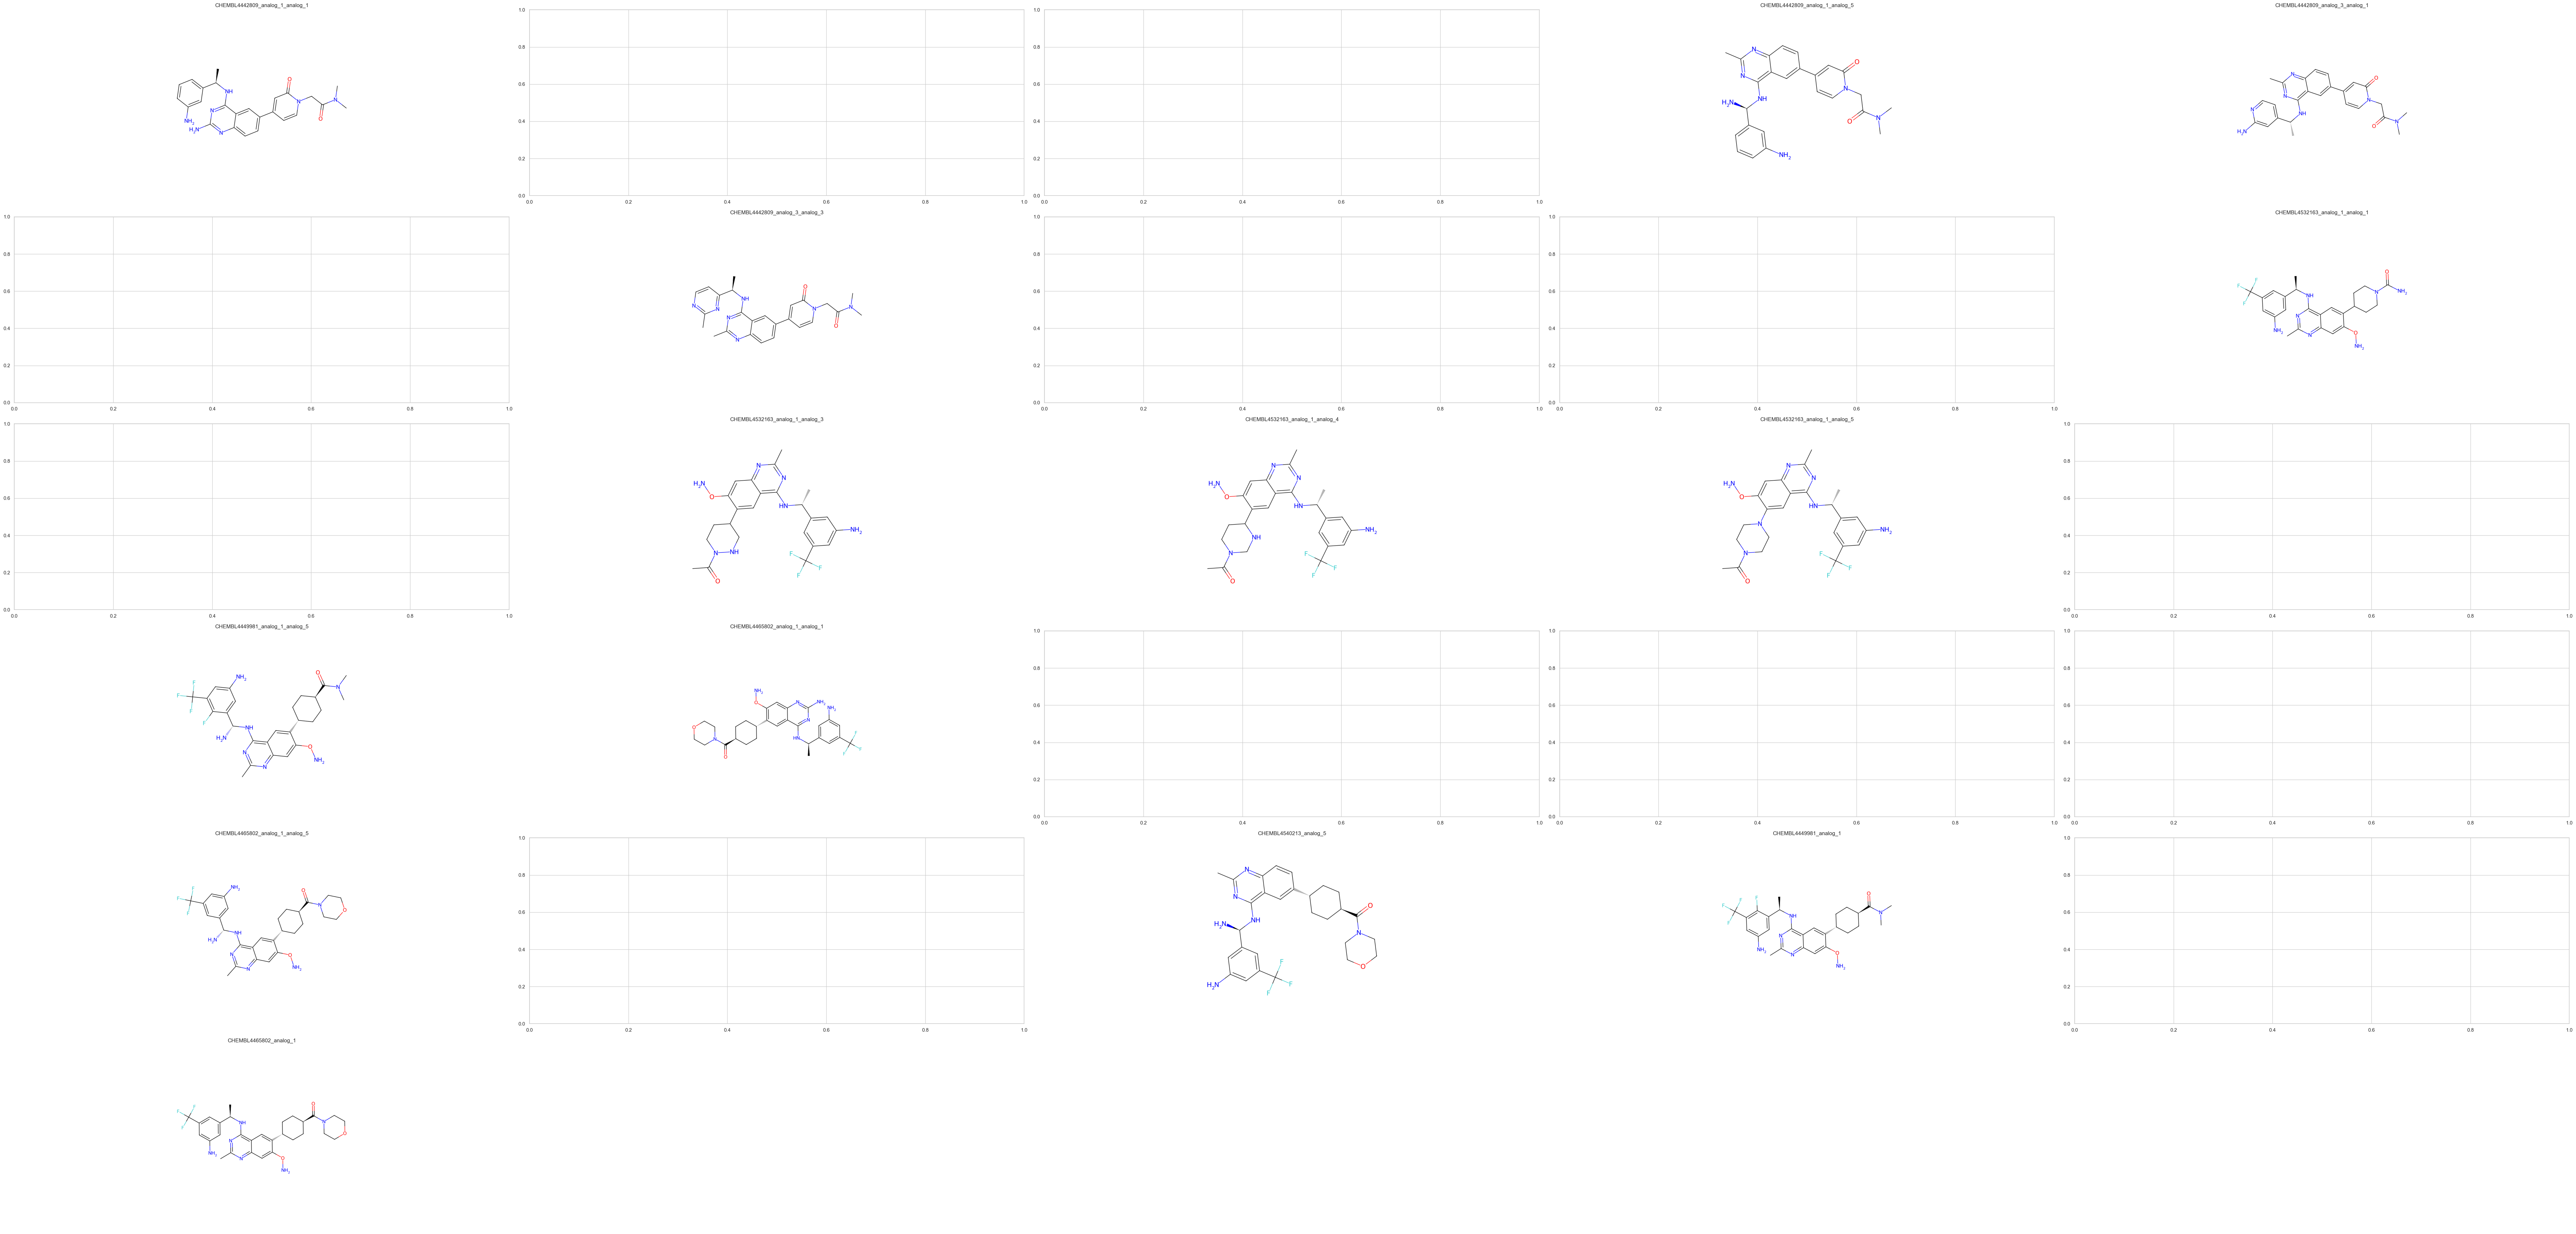

In [234]:
all_graph(good_analog_df_feedback_1)

## **Repeat the cycle n times**

In [235]:
def feedback_n_times(num_cycles, good_analogues_df):
    
    for cycle_num in range(num_cycles):
        if cycle_num == 0:
            feedback_cycle_analogues = analoges(good_analogues_df)  
        else:
            feedback_cycle_analogues = good_analog_df(df, good_analogues_df)  
            feedback_cycle_analogues = analoges(feedback_cycle_analogues)  


        create_txt_file('feedback_cycle_{}_analog.txt'.format(cycle_num), feedback_cycle_analogues)  
        df = load_data_df_and_prediction('feedback_cycle_{}_analog.txt'.format(cycle_num)) 
        print(resume_better_analogues(df))



In [241]:
def feedback_n_times(num_cycles, good_analogues_df):
    for cycle_num in range(num_cycles):
        try:
            if cycle_num == 0:
                feedback_cycle_analogues = analoges(good_analogues_df)  
            else:
                feedback_cycle_analogues = good_analog_df(df, good_analogues_df)  
                feedback_cycle_analogues = analoges(feedback_cycle_analogues)  

            create_txt_file('feedback_cycle_{}_analog.txt'.format(cycle_num), feedback_cycle_analogues)  
            df = load_data_df_and_prediction('feedback_cycle_{}_analog.txt'.format(cycle_num)) 
            print(resume_better_analogues(df))
        except Exception as e:
            print(f"Se produjo un error: {e}")
            break


In [242]:
#If an error occurs, it is simply because you have not found a better analogue. If an error occurs, it is simply because you have not found a better analogue. but in the output are the ones it has found.
feedback_n_times(5,good_analog_df_feedback_1)

[19:01:54] Can't kekulize mol.  Unkekulized atoms: 3 4 7 8 9 10 11 25 26
[19:01:54] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 20 21 33
[19:01:54] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 13
[19:01:54] Can't kekulize mol.  Unkekulized atoms: 1 2 31 32 33
[19:01:54] Explicit valence for atom # 4 N, 4, is greater than permitted
[19:01:54] Explicit valence for atom # 25 N, 4, is greater than permitted
[19:01:54] Explicit valence for atom # 5 N, 4, is greater than permitted
[19:01:54] Can't kekulize mol.  Unkekulized atoms: 3 4 7 8 9 10 13 28 29
[19:01:54] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 8 23 24 40
[19:01:54] Explicit valence for atom # 5 N, 4, is greater than permitted
[19:01:54] Explicit valence for atom # 5 N, 4, is greater than permitted
[19:01:54] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 25 26 27


Error when creating the analogue for the molecule CHEMBL4442809_analog_1_analog_2. Error: Python argument types in
    RWMol.__init__(RWMol, NoneType)
did not match C++ signature:
    __init__(struct _object * __ptr64, class RDKit::ROMol mol, bool quickCopy=False, int confId=-1)
    __init__(struct _object * __ptr64, class std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> > pklString, unsigned int propertyFlags)
    __init__(struct _object * __ptr64, class std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> > pklString)
    __init__(struct _object * __ptr64)
    __init__(struct _object * __ptr64, class RDKit::ROMol)
Error when creating the analogue for the molecule CHEMBL4442809_analog_1_analog_2. Error: Python argument types in
    RWMol.__init__(RWMol, NoneType)
did not match C++ signature:
    __init__(struct _object * __ptr64, class RDKit::ROMol mol, bool quickCopy=False, int confId=-1)
    __init__(struct _object * __ptr64,

This CHEMBL4442809_analog_1_analog_1_analog_1 has a higher pIC50 than its original molecule CHEMBL4442809_analog_1_analog_1 with a value of 6.410703109313021, with a difference of 0.12556570266547062
This CHEMBL4442809_analog_1_analog_1_analog_2 has a higher pIC50 than its original molecule CHEMBL4442809_analog_1_analog_1 with a value of 7.330128212687651, with a difference of 1.0449908060401008
This CHEMBL4442809_analog_1_analog_1_analog_4 has a higher pIC50 than its original molecule CHEMBL4442809_analog_1_analog_1 with a value of 7.515534563257576, with a difference of 1.2303971566100262
This CHEMBL4442809_analog_1_analog_1_analog_5 has a higher pIC50 than its original molecule CHEMBL4442809_analog_1_analog_1 with a value of 7.515534563257576, with a difference of 1.2303971566100262
This CHEMBL4442809_analog_1_analog_5_analog_1 has a higher pIC50 than its original molecule CHEMBL4442809_analog_1_analog_2 with a value of 7.515534563257576, with a difference of 1.453285209840991
This 

[19:02:11] Explicit valence for atom # 5 N, 4, is greater than permitted
[19:02:11] Explicit valence for atom # 5 N, 4, is greater than permitted
[19:02:11] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 25 26 27


This CHEMBL4465802_analog_1_analog_5_analog_5 has a higher pIC50 than its original molecule CHEMBL4465802_analog_1_analog_4 with a value of 8.123676231851837, with a difference of 0.04864157139349423
This CHEMBL4449981_analog_1_analog_4 has a higher pIC50 than its original molecule CHEMBL4540213_analog_4 with a value of 8.105790524476705, with a difference of 0.15602701924723306
This CHEMBL4449981_analog_1_analog_5 has a higher pIC50 than its original molecule CHEMBL4540213_analog_4 with a value of 8.10536301732244, with a difference of 0.15559951209296763
This CHEMBL4465802_analog_1_analog_1 has a higher pIC50 than its original molecule CHEMBL4540213_analog_5 with a value of 7.996479671451237, with a difference of 0.1693487602307071
This CHEMBL4465802_analog_1_analog_2 has a higher pIC50 than its original molecule CHEMBL4540213_analog_5 with a value of 8.155032912796084, with a difference of 0.3279020015755547
This CHEMBL4465802_analog_1_analog_5 has a higher pIC50 than its original m

[19:02:19] Explicit valence for atom # 5 N, 4, is greater than permitted
[19:02:19] Can't kekulize mol.  Unkekulized atoms: 3 4 7 8 9 10 13 28 29


This CHEMBL4449981_analog_1_analog_5_analog_3 has a higher pIC50 than its original molecule CHEMBL4449981_analog_1_analog_4 with a value of 8.10536301732244, with a difference of 0.014589059063617071
This CHEMBL4449981_analog_1_analog_5_analog_5 has a higher pIC50 than its original molecule CHEMBL4449981_analog_1_analog_4 with a value of 8.105790524476705, with a difference of 0.015016566217882499
This CHEMBL4465802_analog_1_analog_1_analog_1 has a higher pIC50 than its original molecule CHEMBL4449981_analog_1_analog_5 with a value of 7.996479671451237, with a difference of 0.04671616622176522
This CHEMBL4465802_analog_1_analog_1_analog_2 has a higher pIC50 than its original molecule CHEMBL4449981_analog_1_analog_5 with a value of 7.996479671451237, with a difference of 0.04671616622176522
This CHEMBL4465802_analog_1_analog_5_analog_4 has a higher pIC50 than its original molecule CHEMBL4465802_analog_1_analog_1 with a value of 8.123676231851837, with a difference of 0.12719656040060023

[19:02:26] Explicit valence for atom # 5 N, 4, is greater than permitted


This CHEMBL4465802_analog_1_analog_5_analog_4 has a higher pIC50 than its original molecule CHEMBL4465802_analog_1_analog_4 with a value of 8.123676231851837, with a difference of 0.04864157139349423
This CHEMBL4465802_analog_1_analog_5_analog_5 has a higher pIC50 than its original molecule CHEMBL4465802_analog_1_analog_4 with a value of 8.155032912796084, with a difference of 0.0799982523377416
None
Se produjo un error: No objects to concatenate


In [237]:
def graph_smiles(smiles):

    
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        
        img = Draw.MolToImage(mol, size=(800,800))
        
        
        plt.imshow(np.array(img))
        plt.axis('off')  
        plt.show()
    else:
        print(f'Could not generate a molecule from the SMILES string: {smiles}')


Could be interesting built a code that let us search similar molecules

## This is the best

In [238]:
import numpy as np

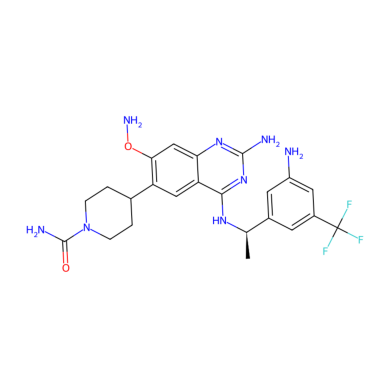

In [239]:
graph_smiles('C[C@@H](Nc1nc(N)nc2cc(ON)c(C3CCN(C(N)=O)CC3)cc12)c1cc(N)cc(C(F)(F)F)c1')

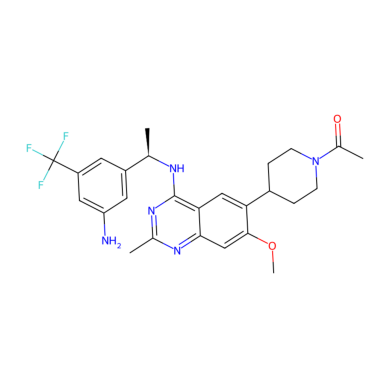

In [240]:
graph_smiles('COc1cc2nc(C)nc(N[C@H](C)c3cc(N)cc(C(F)(F)F)c3)c2cc1C1CCN(C(C)=O)CC1')

#### **Part of this Jupyter notebook was made thanks to the videos of [*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)**